In [18]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_orders = pd.read_pickle("../data/df_orders.pkl")
df_customers = pd.read_pickle("../data/df_customers.pkl")
df_items = pd.read_pickle("../data/df_items.pkl")
df_reviews = pd.read_pickle("../data/df_reviews.pkl")
df_products = pd.read_pickle("../data/df_products.pkl")
df_sellers = pd.read_pickle("../data/df_sellers.pkl")
df_geolocation = pd.read_pickle("../data/df_geolocation.pkl")
df_category_translation = pd.read_pickle("../data/df_category_translation.pkl")
df_payments = pd.read_pickle("../data/df_payments.pkl")

In [6]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


object datatime cevirdik yıl ve ay tablosu olusturduk 

In [30]:
# order_delivered_customer_date,order_purchase_timestamp sütunlarını datetime'a çevir
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

# Yeni sütunlar oluşturalım: yıl, ay, yıl-ay (zaman serisi için)
df_orders['order_year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

df_orders.head(5)




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02


zaman içinde Aylık sipariş sayısını hesaplayalım

In [ ]:

monthly_orders = df_orders.groupby('order_year_month')['order_id'].count().reset_index()
monthly_orders.columns = ['Tarih', 'Sipariş Sayısı']
monthly_orders.head(20)


,Tarih,Sipariş Sayısı
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [24]:
# Tarihi datetime'a çevir (grafik için)
monthly_orders['Tarih'] = monthly_orders['Tarih'].dt.to_timestamp()

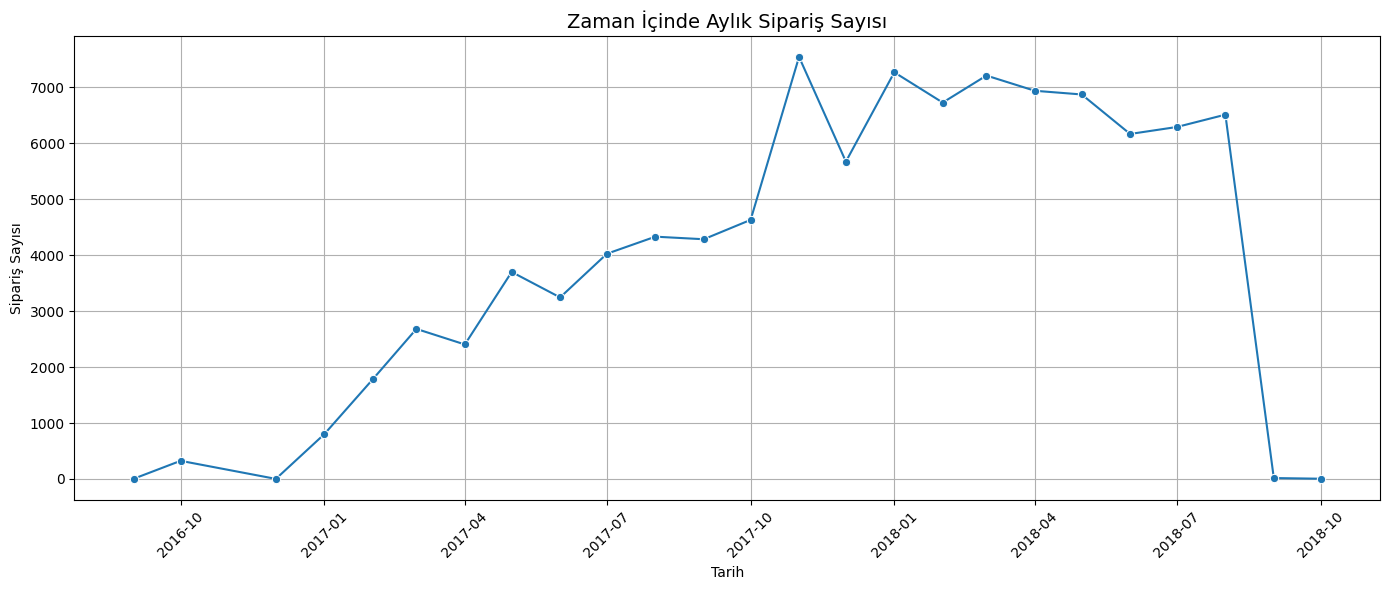

In [26]:

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_orders, x='Tarih', y='Sipariş Sayısı', marker='o')
plt.title('Zaman İçinde Aylık Sipariş Sayısı', fontsize=14)
plt.xlabel('Tarih')
plt.ylabel('Sipariş Sayısı')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 2017’nin ortasından itibaren sipariş sayısında düzenli bir artış gözleniyor.

📆 Kasım ve Aralık aylarında belirgin bir artış var; bu da yıl sonu alışveriş sezonunun etkisi olabilir.

📉 2016’nın son çeyreğinde düşük sipariş sayıları dikkat çekiyor; veri setinin başlangıç kısmı olabilir.

📊 Sezonluk etkiler satış planlaması için önemli bir ipucu sunuyor.

 Sipariş durumu bazında sipariş sayısını ve oranını hesaplayalım

In [ ]:

status_counts = df_orders['order_status'].value_counts() 
status_percent = (status_counts / len(df_orders) * 100).round(2) #yüzde 

# Sonuçları tablo haline getirelim
status_summary = pd.DataFrame({
    'Sipariş Durumu': status_counts.index,
    'Sipariş Sayısı': status_counts.values,
    'Yüzde (%)': status_percent.values
})

print(status_summary)


# - delivered: Siparişlerin büyük çoğunluğu başarılı bir şekilde teslim edilmiş.
# - shipped: Kargoya verilmiş ancak henüz teslim edilmemiş siparişler.
# - canceled: İptal edilen siparişler, iş süreçlerindeki sorunlar veya müşteri kararı olabilir.
# - invoiced, processing, unavailable, created, approved: Siparişin diğer farklı aşamalarını gösterir; bunların oranları düşük olabilir.
# Bu dağılım, lojistik ve müşteri deneyimini anlamak için önemli.


  Sipariş Durumu  Sipariş Sayısı  Yüzde (%)
0      delivered           96478      97.02
1        shipped            1107       1.11
2       canceled             625       0.63
3    unavailable             609       0.61
4       invoiced             314       0.32
5     processing             301       0.30
6        created               5       0.01
7       approved               2       0.00


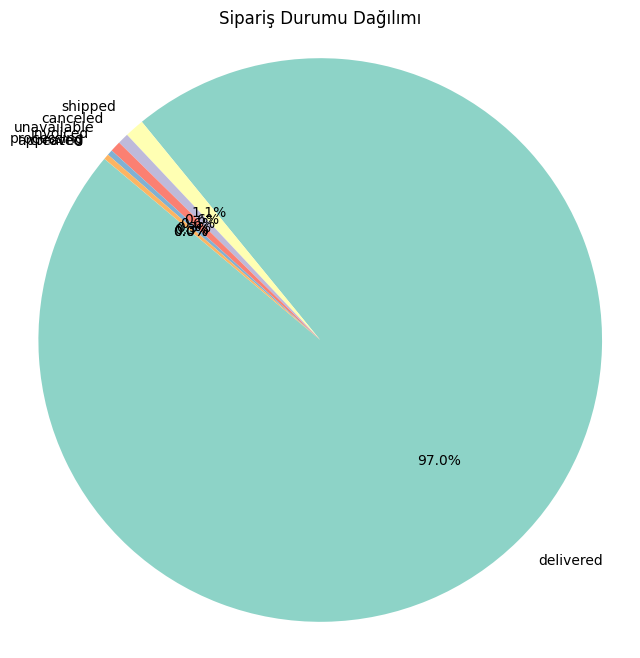

In [42]:
import matplotlib.pyplot as plt

# Sipariş durumlarına göre gruplama ve sayma
order_status_counts = df_orders['order_status'].value_counts()
order_status_percent = (order_status_counts / len(df_orders) * 100).round(2)

# Grafik için veriyi hazırlama
labels = order_status_counts.index
sizes = order_status_counts.values

# Renk paleti (isteğe göre özelleştirilebilir)
colors = plt.cm.Set3(range(len(labels)))

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sipariş Durumu Dağılımı')
plt.axis('equal')  # Daire şeklinde gösterim
plt.show()


siparişlerin tahmini teslim süresini hesaplayalım 

In [49]:

# Sadece teslim edilmiş siparişleri alalım
df_delivered = df_orders[df_orders['order_status'] == 'delivered'].copy()

# Teslim süresi (gün olarak) hesaplayalım
df_delivered['teslim_suresi_gun'] = (df_delivered['order_delivered_customer_date'] - df_delivered['order_purchase_timestamp']).dt.days

# İlk birkaç örneği görelim
df_delivered[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'teslim_suresi_gun']].head(10)


,order_id,order_purchase_timestamp,order_delivered_customer_date,teslim_suresi_gun
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2.0
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,2017-07-26 10:57:55,16.0
7,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,2017-05-26 12:55:51,9.0
8,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,2017-02-02 14:08:10,9.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-08-16 17:14:30,18.0
10,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:10,2017-05-29 11:18:31,12.0


In [50]:
# Ortalama teslim süresi
ortalama_teslim_suresi = df_delivered['teslim_suresi_gun'].mean().round(2)
print(ortalama_teslim_suresi)

12.09


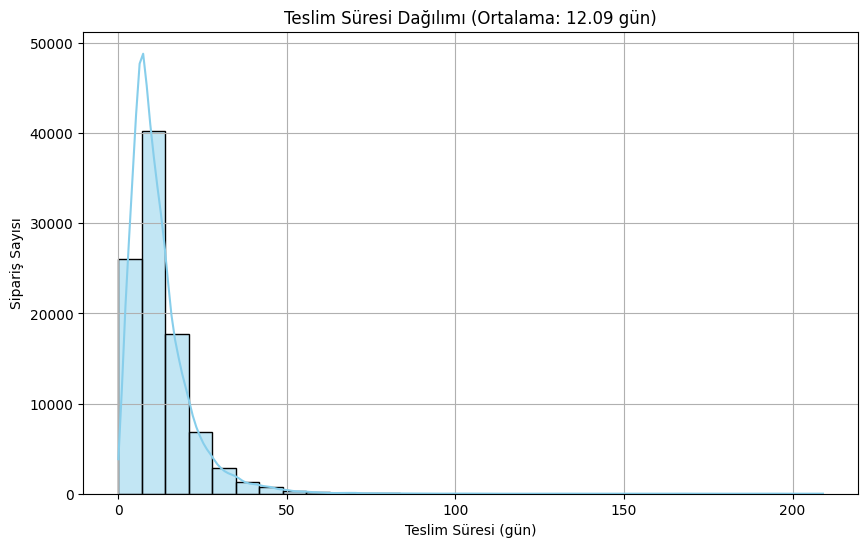

In [35]:

plt.figure(figsize=(10,6))
sns.histplot(df_delivered['teslim_suresi_gun'], bins=30, kde=True, color='skyblue')
plt.title(f'Teslim Süresi Dağılımı (Ortalama: {ortalama_teslim_suresi} gün)')
plt.xlabel('Teslim Süresi (gün)')
plt.ylabel('Sipariş Sayısı')
plt.grid(True)
plt.show()


0-50 gün arsındaki teslim sürelerini detaylı tabloda inceleme

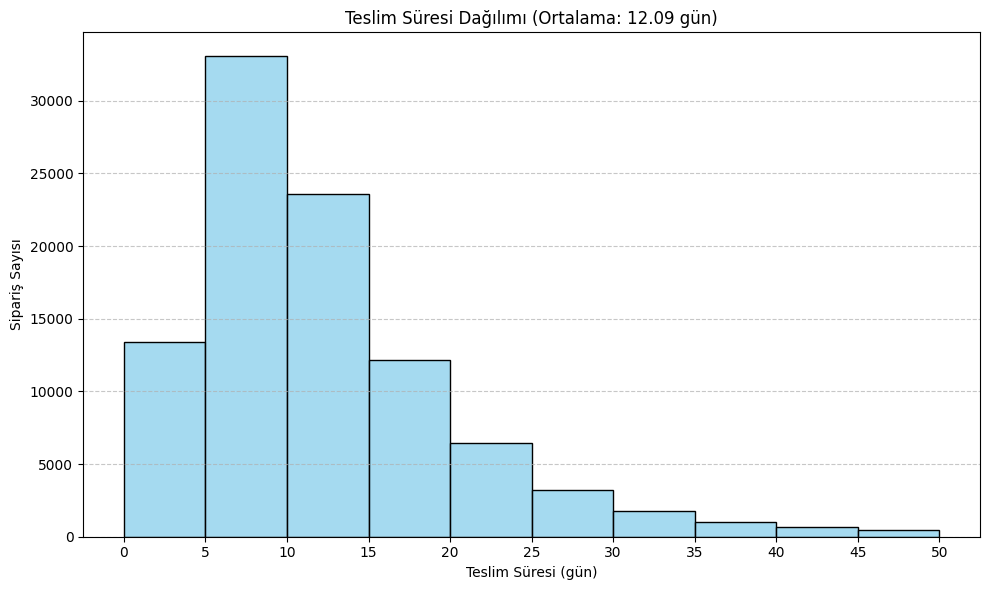

In [40]:
plt.figure(figsize=(10,6))

# 0'dan 50'ye kadar 5'er artan aralıklarla bin oluşturuyoruz
bins = np.arange(0, 55, 5)

sns.histplot(df_delivered['teslim_suresi_gun'], bins=bins, kde=False, color='skyblue', edgecolor='black')

plt.title(f'Teslim Süresi Dağılımı (Ortalama: {ortalama_teslim_suresi} gün)')
plt.xlabel('Teslim Süresi (gün)')
plt.ylabel('Sipariş Sayısı')
plt.xticks(bins)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Ay Bazında Ortalama Teslim Süresi

C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\951987319.py:17: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\Olist E-Commerce Analytics Project\Olist-E-Commerce-Analytics-Project\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


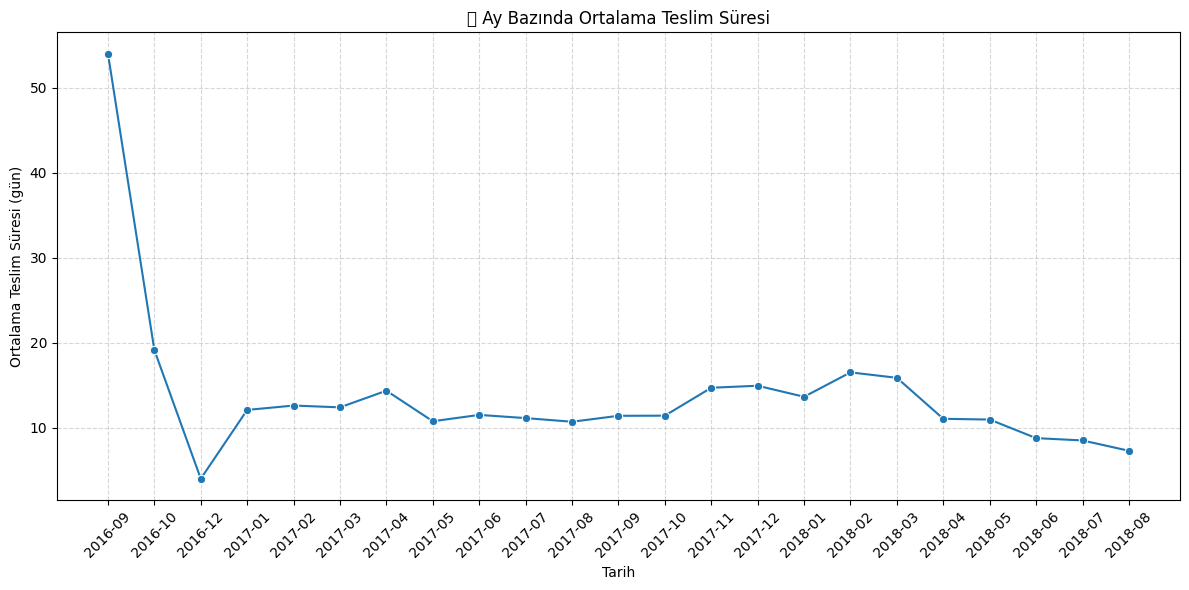

In [38]:
# Sipariş tarihi ile teslim tarihi arasındaki farkı zaten 'teslim_suresi_gun' olarak hesaplamıştık
# Sipariş tarihini yıl-ay formatına çeviriyoruz
df_delivered['order_year_month'] = df_delivered['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Ay bazında ortalama teslim süresini hesaplıyoruz
monthly_avg_delivery = df_delivered.groupby('order_year_month')['teslim_suresi_gun'].mean().reset_index()
monthly_avg_delivery.columns = ['Tarih', 'Ortalama Teslim Süresi (gün)']

# Görselleştirme
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg_delivery, x='Tarih', y='Ortalama Teslim Süresi (gün)', marker='o')
plt.xticks(rotation=45)
plt.title('📦 Ay Bazında Ortalama Teslim Süresi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Teslim Süresi (gün)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


df_customers

In [45]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [57]:
df_customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


benzersiz müşteri sayısını ve şehir, eyalet gibi kategorik değişkenlerin çeşitliliği

In [58]:
print("Toplam kayıt sayısı:", len(df_customers))
print("Benzersiz customer_id sayısı:", df_customers['customer_id'].nunique())
print("Benzersiz customer_unique_id sayısı:", df_customers['customer_unique_id'].nunique())
print("Farklı şehir sayısı:", df_customers['customer_city'].nunique())
print("Farklı eyalet sayısı:", df_customers['customer_state'].nunique())


Toplam kayıt sayısı: 99441
Benzersiz customer_id sayısı: 99441
Benzersiz customer_unique_id sayısı: 96096
Farklı şehir sayısı: 4119
Farklı eyalet sayısı: 27


MÜŞTERİLERİN EYALET BAZINDAKİ DAĞILIMLARI

In [63]:

state_counts = df_customers['customer_state'].value_counts().reset_index()
state_counts.columns = ['customer_state', 'count']

print(state_counts.head(10))



  customer_state  count
0             SP  41746
1             RJ  12852
2             MG  11635
3             RS   5466
4             PR   5045
5             SC   3637
6             BA   3380
7             DF   2140
8             ES   2033
9             GO   2020


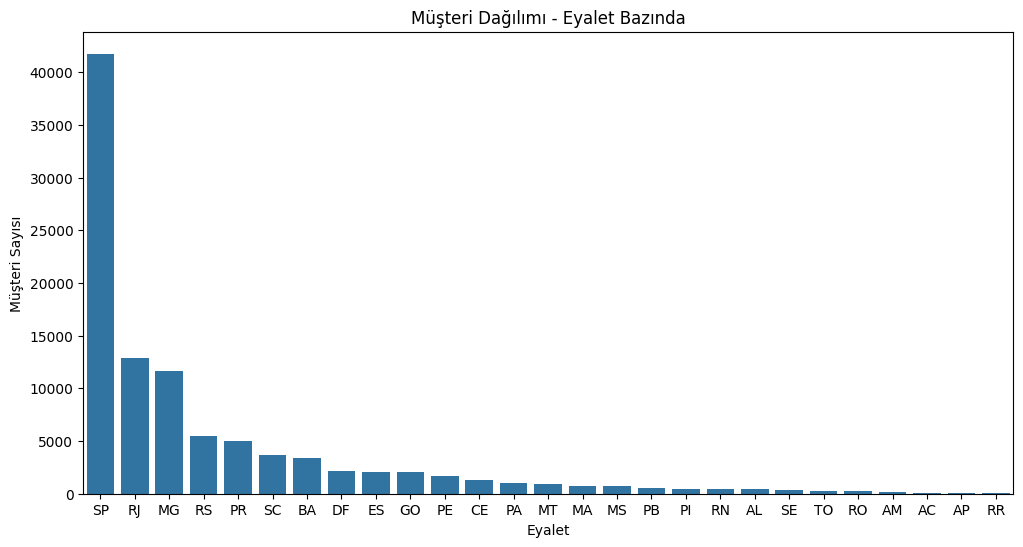

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x='customer_state', y='count', order=state_counts['customer_state'])
plt.title('Müşteri Dağılımı - Eyalet Bazında')
plt.xlabel('Eyalet')
plt.ylabel('Müşteri Sayısı')
plt.show()

Şehir bazında müşteri sayısı

In [80]:

city_counts = df_customers['customer_city'].value_counts().reset_index()
city_counts.columns = ['customer_city', 'count']

print(city_counts.head(10))

           customer_city  count
0              sao paulo  15540
1         rio de janeiro   6882
2         belo horizonte   2773
3               brasilia   2131
4               curitiba   1521
5               campinas   1444
6           porto alegre   1379
7               salvador   1245
8              guarulhos   1189
9  sao bernardo do campo    938


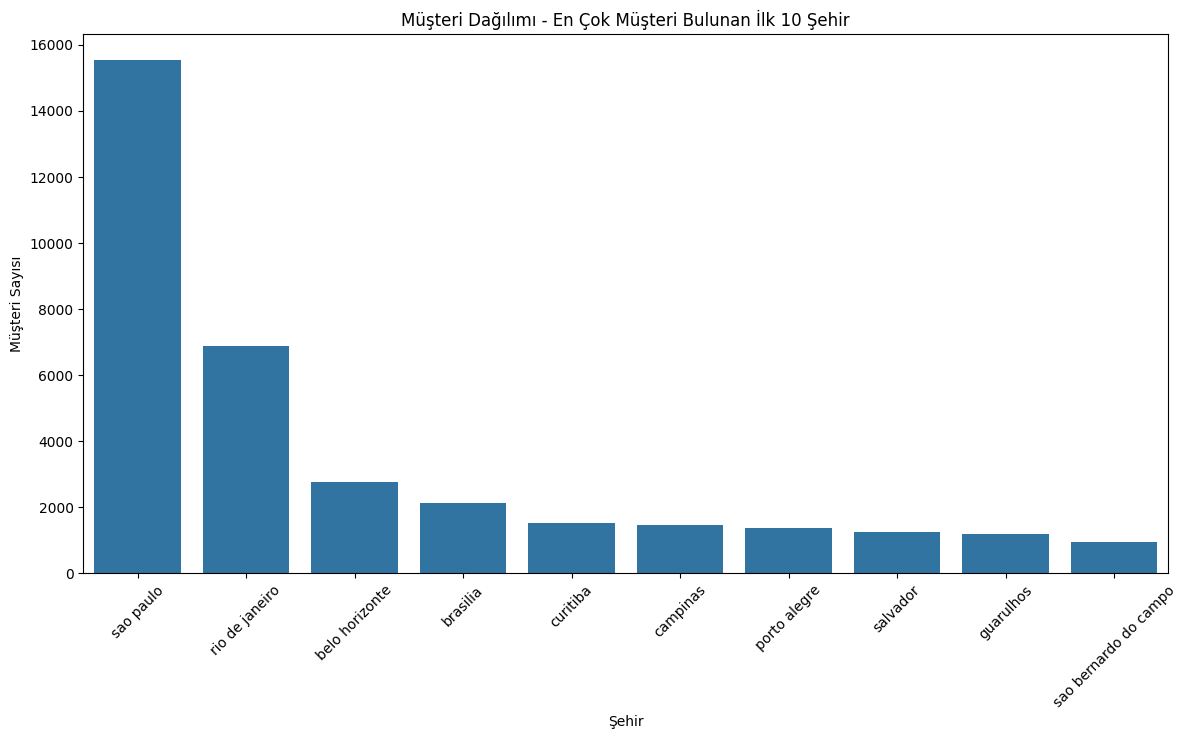

In [81]:
# Grafik çizimi
plt.figure(figsize=(14,7))
sns.barplot(data=top_cities, x='customer_city', y='count', order=top_cities['customer_city'])
plt.title('Müşteri Dağılımı - En Çok Müşteri Bulunan İlk 10 Şehir')
plt.xlabel('Şehir')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45)
plt.show()



Posta kodlarına göre müşteri sayısı DataFrame oluşturma ve en yoğun 10 posta kodunu bulma:

In [83]:
zip_counts = df_customers['customer_zip_code_prefix'].value_counts().reset_index()
zip_counts.columns = ['customer_zip_code_prefix', 'count']

print(zip_counts.head(10))


   customer_zip_code_prefix  count
0                     22790    142
1                     24220    124
2                     22793    121
3                     24230    117
4                     22775    110
5                     29101    101
6                     13212     95
7                     35162     93
8                     22631     89
9                     38400     87


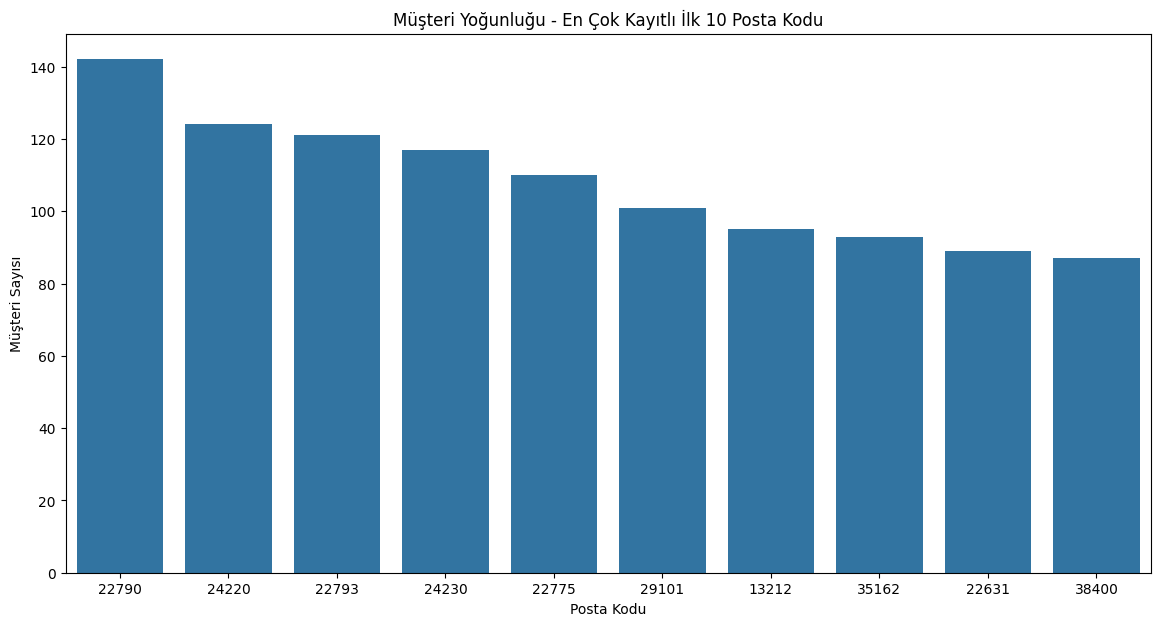

In [84]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_zip_codes, x='customer_zip_code_prefix', y='count', order=top_zip_codes['customer_zip_code_prefix'])
plt.title('Müşteri Yoğunluğu - En Çok Kayıtlı İlk 10 Posta Kodu')
plt.xlabel('Posta Kodu')
plt.ylabel('Müşteri Sayısı')
plt.show()

 Aynı müşteri (customer_unique_id) birden fazla kayıt yapmış mı, kaç müşteri birden fazla kayıtlı?

In [61]:
# Her unique customer_id kaç kere geçmiş?
customer_counts = df_customers['customer_unique_id'].value_counts()

# Birden fazla kaydı olan müşteriler:
multiple_records = customer_counts[customer_counts > 1]

print("Birden fazla kaydı olan müşteri sayısı:", multiple_records.count())
print("Toplam kayıt sayısına oranı: {:.2f}%".format(multiple_records.count() / df_customers['customer_unique_id'].nunique() * 100))


Birden fazla kaydı olan müşteri sayısı: 2997
Toplam kayıt sayısına oranı: 3.12%


In [112]:
# df_orders ile customer_unique_id bilgilerini birleştiriyoruz
df_orders_customers_unique = df_orders.merge(df_customers[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], on='customer_id', how='left')

# Unique müşteri başına sipariş sayısı
orders_per_unique_customer = df_orders_customers_unique.groupby('customer_unique_id')['order_id'].nunique()

print("Unique müşteri başına ortalama sipariş sayısı:", orders_per_unique_customer.mean())
print("Birden fazla sipariş veren unique müşteri sayısı:", (orders_per_unique_customer > 1).sum())
print("Toplam unique müşteri sayısı (sipariş veren):", orders_per_unique_customer.count())


Unique müşteri başına ortalama sipariş sayısı: 1.0348089410589412
Birden fazla sipariş veren unique müşteri sayısı: 2997
Toplam unique müşteri sayısı (sipariş veren): 96096


df_orders ve df_customers'ı customer_id üzerinden birleştiriyoruz

In [96]:
df_orders_customers = df_orders.merge(df_customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')

df_orders_customers.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year_month,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,santo andre,SP


Şehirlere göre toplam sipariş sayısı

In [97]:

orders_by_city = df_orders_customers['customer_city'].value_counts().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

print(orders_by_city.head(10))




           customer_city  order_count
0              sao paulo        15540
1         rio de janeiro         6882
2         belo horizonte         2773
3               brasilia         2131
4               curitiba         1521
5               campinas         1444
6           porto alegre         1379
7               salvador         1245
8              guarulhos         1189
9  sao bernardo do campo          938


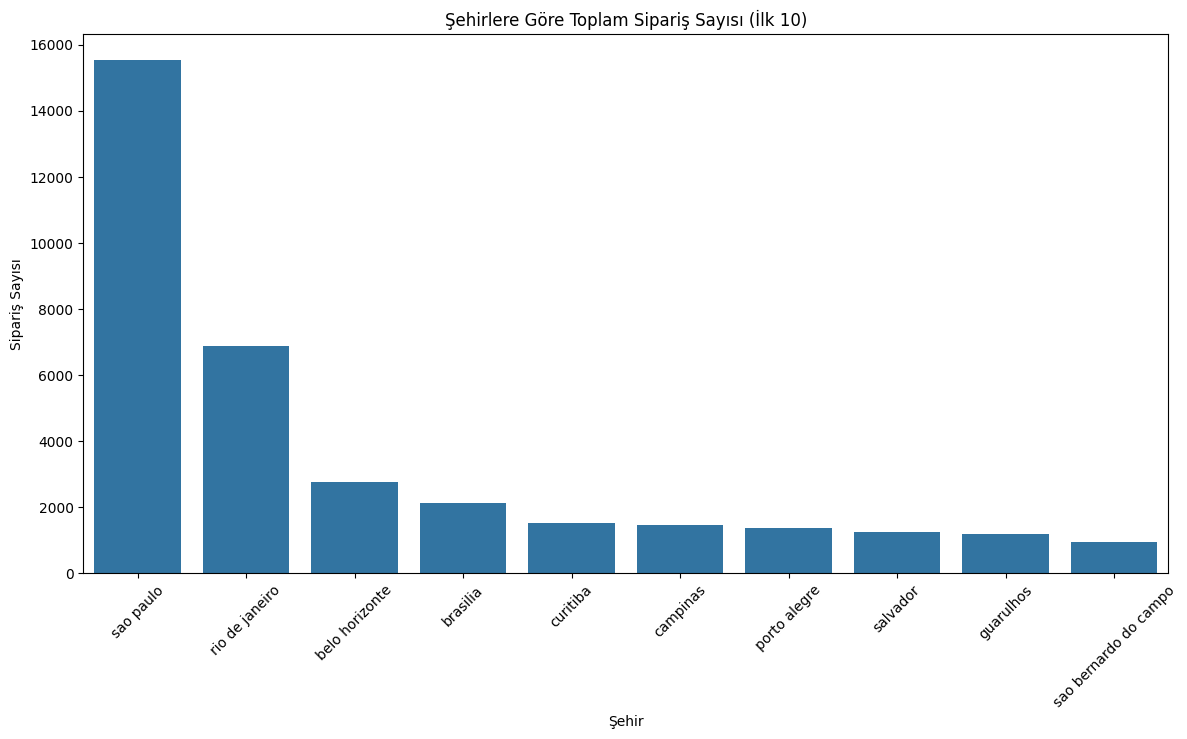

In [98]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_10_cities, x='customer_city', y='order_count', order=top_10_cities['customer_city'])
plt.title('Şehirlere Göre Toplam Sipariş Sayısı (İlk 10)')
plt.xlabel('Şehir')
plt.ylabel('Sipariş Sayısı')
plt.xticks(rotation=45)
plt.show()

şehirlere göre hem müşteri sayısını hem de sipariş sayısını bir arada inceleme

In [ ]:



# Sipariş sayısı zaten elimizdeydi, tekrar edelim:
orders_by_city = df_orders_customers['customer_city'].value_counts().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

# İki tabloyu birleştirelim
city_summary = customers_by_city.merge(orders_by_city, on='customer_city')

city_summary.head()


,customer_city,customer_count,order_count
0,sao paulo,15540,15540
1,rio de janeiro,6882,6882
2,belo horizonte,2773,2773
3,brasilia,2131,2131
4,curitiba,1521,1521


In [110]:

# 1. Şehirlere göre müşteri sayısı
customers_by_city = df_customers['customer_city'].value_counts().reset_index()
customers_by_city.columns = ['customer_city', 'customer_count']

# 2. Şehirlere göre benzersiz sipariş sayısı
orders_by_city = df_orders_customers.groupby('customer_city')['order_id'].nunique().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

# 3. İki tabloyu birleştiriyoruz
city_summary = customers_by_city.merge(orders_by_city, on='customer_city')

city_summary.head(10)


,customer_city,customer_count,order_count
0,sao paulo,15540,15540
1,rio de janeiro,6882,6882
2,belo horizonte,2773,2773
3,brasilia,2131,2131
4,curitiba,1521,1521
5,campinas,1444,1444
6,porto alegre,1379,1379
7,salvador,1245,1245
8,guarulhos,1189,1189
9,sao bernardo do campo,938,938


In [111]:
# Her müşterinin kaç siparişi var?
orders_per_customer = df_orders.groupby('customer_id')['order_id'].nunique()

# Ortalama sipariş sayısı
print("Müşteri başına ortalama sipariş sayısı:", orders_per_customer.mean())

# Kaç müşteri 1'den fazla sipariş vermiş?
print("Birden fazla sipariş veren müşteri sayısı:", (orders_per_customer > 1).sum())

# Toplam müşteri sayısı
print("Toplam müşteri sayısı (sipariş veren):", orders_per_customer.count())


Müşteri başına ortalama sipariş sayısı: 1.0
Birden fazla sipariş veren müşteri sayısı: 0
Toplam müşteri sayısı (sipariş veren): 99441


In [118]:
# 1. Birleştirme: customer_id üzerinden, gerekli kolonlarla birlikte
df_orders_customers = df_orders.merge(
    df_customers[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# 2. Her unique müşteri için sipariş sayısı
orders_per_unique_customer = df_orders_customers.groupby('customer_unique_id')['order_id'].nunique()

# 3. Sipariş sayılarının dağılımı
order_counts_distribution = orders_per_unique_customer.value_counts().sort_index()

# 4. Ortalama sipariş sayısı
average_orders_per_customer = orders_per_unique_customer.mean()

# 5. Birden fazla sipariş veren müşteri sayısı
multiple_orders_customers_count = orders_per_unique_customer[orders_per_unique_customer > 1].count()

# 6. Toplam unique müşteri sayısı (sipariş veren)
total_unique_customers = orders_per_unique_customer.count()

print("Sipariş sayılarının dağılımı:\n", order_counts_distribution)
print(f"\nUnique müşteri başına ortalama sipariş sayısı: {average_orders_per_customer:.4f}")
print(f"Birden fazla sipariş veren unique müşteri sayısı: {multiple_orders_customers_count}")
print(f"Toplam unique müşteri sayısı (sipariş veren): {total_unique_customers}")


Sipariş sayılarının dağılımı:
 order_id
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

Unique müşteri başına ortalama sipariş sayısı: 1.0348
Birden fazla sipariş veren unique müşteri sayısı: 2997
Toplam unique müşteri sayısı (sipariş veren): 96096


In [119]:
missing_city_orders = df_orders_customers['customer_city'].isna().sum()
print(f"Şehir bilgisi olmayan sipariş sayısı: {missing_city_orders}")




Şehir bilgisi olmayan sipariş sayısı: 0


. Şehirlere göre toplam sipariş sayısını ve müşteri sayısını daha detaylı karşılaştır

In [120]:
# Şehir bazında müşteri sayısı
customers_by_city = df_customers.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
customers_by_city.columns = ['customer_city', 'unique_customer_count']

# Şehir bazında sipariş sayısı
orders_by_city = df_orders_customers.groupby('customer_city')['order_id'].nunique().reset_index()
orders_by_city.columns = ['customer_city', 'unique_order_count']

# İkisini birleştir
city_summary = customers_by_city.merge(orders_by_city, on='customer_city', how='outer').fillna(0)

# Ortalama sipariş sayısı (şehir bazında)
city_summary['avg_orders_per_customer'] = city_summary['unique_order_count'] / city_summary['unique_customer_count']

city_summary.sort_values(by='unique_customer_count', ascending=False).head(10)


,customer_city,unique_customer_count,unique_order_count,avg_orders_per_customer
3597,sao paulo,14984,15540,1.037106
3155,rio de janeiro,6620,6882,1.039577
453,belo horizonte,2672,2773,1.037799
558,brasilia,2069,2131,1.029966
1143,curitiba,1465,1521,1.038225
707,campinas,1398,1444,1.032904
2964,porto alegre,1326,1379,1.039970
3247,salvador,1209,1245,1.029777
1529,guarulhos,1153,1189,1.031223
3428,sao bernardo do campo,908,938,1.033040


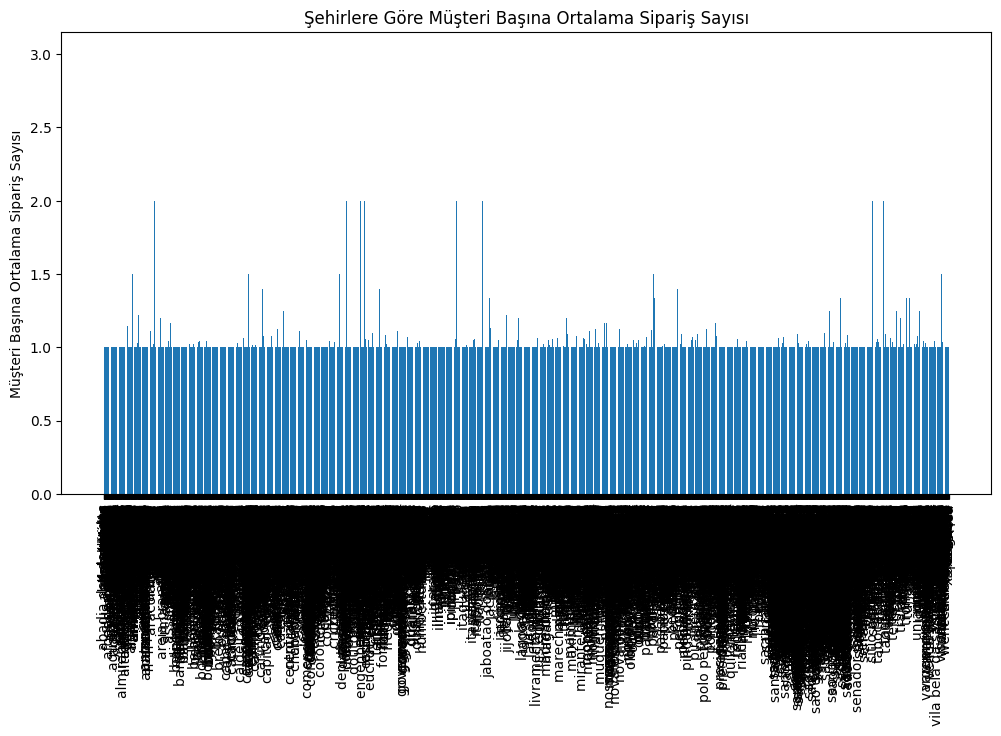

In [122]:
plt.figure(figsize=(12,6))
plt.bar(city_summary['customer_city'], city_summary['avg_orders_per_customer'])
plt.xticks(rotation=90)
plt.ylabel('Müşteri Başına Ortalama Sipariş Sayısı')
plt.title('Şehirlere Göre Müşteri Başına Ortalama Sipariş Sayısı')
plt.show()


n Yüksek Repeat Purchase Rate’e Sahip İlk 10 Şehir

            customer_city  unique_customer_count  unique_order_count  \
315                aruana                      1                   2   
1945                 jari                      2                   4   
1053            corguinho                      1                   2   
1781              itamira                      1                   2   
3670       senador amaral                      1                   2   
2204         mar vermelho                      1                   2   
1819             itapiuna                      1                   2   
2816            piacabucu                      1                   2   
382     barao de cotegipe                      1                   2   
2910  planaltina de goias                      1                   2   

      avg_orders_per_customer  repeat_rate  
315                       2.0          1.0  
1945                      2.0          1.0  
1053                      2.0          1.0  
1781                      2

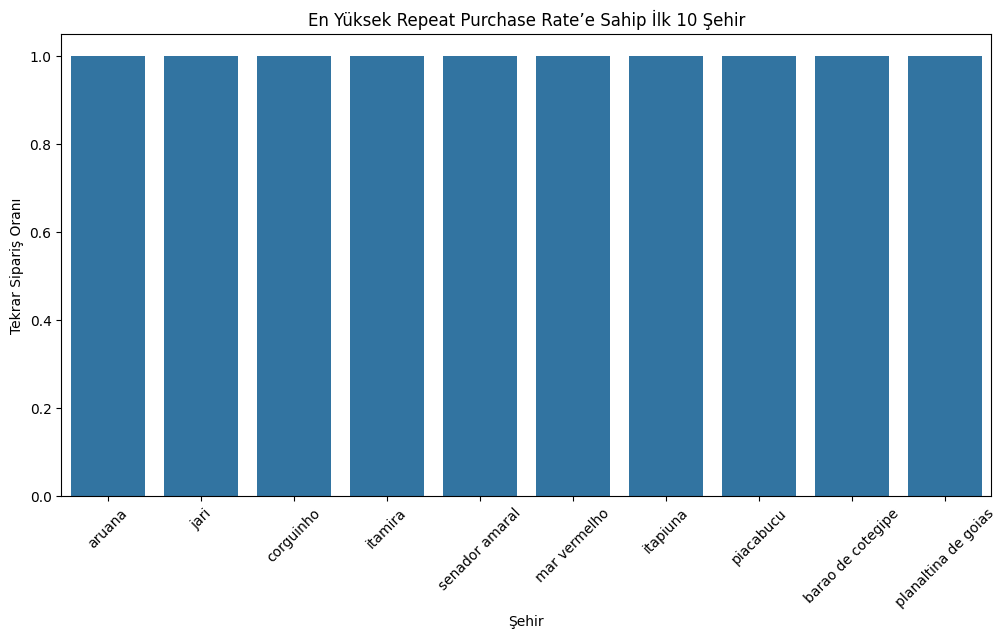

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. df_orders ile df_customers’ı customer_id üzerinden birleştir (customer_unique_id ve city’yi ekle)
df_orders_customers = df_orders.merge(
    df_customers[['customer_id', 'customer_unique_id', 'customer_city']],
    on='customer_id',
    how='left'
)

# 2. Şehir + unique müşteri bazında sipariş sayısını hesapla
orders_unique = (
    df_orders_customers
      .groupby(['customer_city', 'customer_unique_id'])['order_id']
      .nunique()
      .reset_index(name='order_count')
)

# 3. “Repeat” (birden fazla sipariş) flag’i ekle
orders_unique['repeat'] = orders_unique['order_count'] > 1

# 4. Şehir bazında repeat rate’i hesapla
repeat_rate = (
    orders_unique
      .groupby('customer_city')['repeat']
      .mean()
      .reset_index(name='repeat_rate')
)

# 5. Daha önce oluşturduğun city_summary ile birleştir (opsiyonel, ek bağlam için)
city_summary_extended = city_summary.merge(repeat_rate, on='customer_city', how='left').fillna(0)

# 6. En yüksek 10 şehri seç
top_repeat_cities = city_summary_extended.sort_values('repeat_rate', ascending=False).head(10)

# 7. Tabloyu görüntüle
print(top_repeat_cities[['customer_city', 'unique_customer_count', 'unique_order_count', 'avg_orders_per_customer', 'repeat_rate']])

# 8. Çubuk grafikle görselleştir
plt.figure(figsize=(12,6))
sns.barplot(data=top_repeat_cities, x='customer_city', y='repeat_rate')
plt.title('En Yüksek Repeat Purchase Rate’e Sahip İlk 10 Şehir')
plt.xlabel('Şehir')
plt.ylabel('Tekrar Sipariş Oranı')
plt.xticks(rotation=45)
plt.show()


Bu analiz sana şunları gösterecek:

Hangi şehirlerde müşterilerin tekrar sipariş verme oranı daha yüksek?

Tekrar sipariş oranı yüksek şehirlerde sadakat programı, özel kampanyalar veya CRM odaklı aksiyonlar geliştirebilirsin.

Özellikle repeat_rate’in düşük olduğu büyük şehirlerde (örneğin São Paulo’da) tekrar siparişi artırmak için ek stratejiler düşünebilirsin.

Güzel, sonuçlar gerçekten de “en yüksek repeat rate”i veriyor ama burada %100 repeat’e sahip şehirler, aslında yalnızca 1 unique müşteriden (ve onun 2 siparişinden) oluşan çok küçük yerleşimler. Bu, analizde “küçük örneklem”ten kaynaklanan bir yanılsama.

Bir sonraki adım: örneklem büyüklüğü filtresi
Bu tür sapmaları önlemek için “en az X benzersiz müşteri” kriteri koyup, ardından repeat rate’e bakalım. Mesela en az 100 unique müşteri olan şehirleri seçip, onların repeat rate’ine göre sıralayalım:

In [124]:
# city_summary_extended öncesinde oluşturulmuş olması gerekiyor
# 1. Minimum müşteri sayısı filtresi (örn. 100 müşteri)
filtered = city_summary_extended[city_summary_extended['unique_customer_count'] >= 100]

# 2. Repeat rate’e göre sırala ve en yüksek 10’u al
top_repeat_filtered = filtered.sort_values('repeat_rate', ascending=False).head(10)

print(top_repeat_filtered[['customer_city','unique_customer_count','unique_order_count','avg_orders_per_customer','repeat_rate']])


             customer_city  unique_customer_count  unique_order_count  \
2815            petropolis                    220                 240   
208   aparecida de goiania                    104                 110   
2995          pouso alegre                    124                 131   
2936          ponta grossa                    135                 143   
2098               limeira                    181                 190   
2501         nova friburgo                    145                 152   
1390       franco da rocha                    104                 109   
2986           porto velho                    105                 113   
2167                  mage                    106                 111   
900          caxias do sul                    213                 224   

      avg_orders_per_customer  repeat_rate  
2815                 1.090909     0.063636  
208                  1.057692     0.057692  
2995                 1.056452     0.056452  
2936            

Bu sınırı geçtikten sonra büyük şehirler ve orta ölçekliler arasındaki gerçek “repeat behavior” farklarını görebiliriz. Örneğin São Paulo’daki tekrar sipariş oranı belki %3.7, Rio’da %3.9 civarı çıkacak vs. Bu bize hem “yüksek hacme” hem de “yüksek sadakat”e sahip bölgeleri tespit etme imkânı sağlar.

Neden önemli?
Yüksek repeat rate + yüksek müşteri sayısı: Orada sadakat programlarını güçlendirebilir, çapraz satış kampanyaları yürütebilirsin.

Yüksek müşteri sayısı ama düşük repeat rate (örneğin São Paulo): Tekrar siparişi artırmaya yönelik özel teklifler düşünebilirsin.

Orta ölçekli şehirlerde yüksek repeat rate: Buralara lojistik veya depo yatırımı yapmak erken aşamada çok etkili olabilir.

Bu filtreyi uygulayıp çarpıcı sonuçları çıkarırsan, bir sonraki adımda da:

Sadakat programı için hedef şehirler,

Pazarlama bütçesini yeniden dağıtma,

Depo-dağıtım optimizasyonu

gibi somut aksiyon önerileri üzerinde çalışabiliriz. Ne dersin, önce filtrelenmiş sonucu alalım mı?

Gayet güzel, artık gerçekçi bir örneklem üzerinden en yüksek “repeat rate”e sahip şehirleri görüyoruz:

Yorumlar ve Öneriler:

Petrópolis en yüksek %6.36 ile tekrar sipariş oranına sahip. Orta ölçekli ama sadakat seviyesi yüksek bir pazar.

Aparecida de Goiânia, Pouso Alegre ve Ponta Grossa da %5–6 arası oranlarla öne çıkıyor—buralara yönelik sadakat programı veya VIP müşteri ayrıcalıkları hızla kazanım getirebilir.

Daha büyük şehirlerden Caxias do Sul (%4.69) ve Limeira (%4.97) da dikkat çekiyor; oradaki müşteriler de ortalamanın üzerinde tekrar sipariş veriyor.

Bir Sonraki Adım: Aksiyon Planı
Sadakat Programı: Öncelikle bu yüksek repeat rate’e sahip şehirlerde sadakat puan sistemi veya ikinci sipariş indirimi tanıtılabilir.

Kampanyalar: Orta ölçekli şehirlere özel “Hoş Geldin 2. Sipariş” kuponları gönderilebilir.

Lojistik ve Depo: Eğer lojistik altyapınız uygunsa, bu bölgelere mikro depo veya hızlı teslimat noktası eklemeyi düşünebilirsiniz; sadık müşteri kazanımı artacaktır.

Kişiselleştirilmiş İletişim: Yüksek repeat rate şehirlerinde müşteri verilerini detaylandırıp, yeni ürünler veya çapraz satış fırsatları sunacak e-posta/SMS kampanyaları planlayın.

 Cohort (Kohort) Analizi
Amaç: Müşterileri “ilk sipariş ayına” göre gruplandırıp, sonraki aylarda aktif kalma oranlarını izlemek.

In [134]:
import pandas as pd

# 0. Gerekli: df_orders ile df_customers’ı customer_id üzerinde merge et ve customer_unique_id’yi getir
df_orders = df_orders.merge(
    df_customers[['customer_id','customer_unique_id']],
    on='customer_id',
    how='left'
)

# 1. Her unique müşteri için ilk sipariş zamanını bul ve “first_order_month” olarak ata
first_order = (
    df_orders
      .groupby('customer_unique_id')['order_purchase_timestamp']
      .min()
      .dt.to_period('M')
      .dt.to_timestamp()
      .rename('first_order_month')
)

# 2. df_orders’a first_order_month sütununu ekle
df_orders = df_orders.merge(first_order, on='customer_unique_id', how='left')

# 3. Sipariş ayı (“order_month”) bilgisi hazır
df_orders['order_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# 4. Cohort index’i hesapla (ay farkı)
df_orders['cohort_index'] = (
    (df_orders['order_month'].dt.year  - df_orders['first_order_month'].dt.year) * 12
  + (df_orders['order_month'].dt.month - df_orders['first_order_month'].dt.month)
)

# 5. Retention tablosunu oluştur
cohort_data = (
    df_orders
      .groupby(['first_order_month','cohort_index'])['customer_unique_id']
      .nunique()
      .reset_index()
      .pivot(index='first_order_month', columns='cohort_index', values='customer_unique_id')
)

print(cohort_data)
# Bunu bir ısı haritası (heatmap) ile görselleştirmek çok etkili olacaktır.


cohort_index           0     1     2     3     4     5     6     7     8   \
first_order_month                                                           
2016-09-01            4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-01          321.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
2016-12-01            1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-01          764.0   3.0   2.0   1.0   3.0   1.0   4.0   1.0   1.0   
2017-02-01         1752.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0   3.0   
2017-03-01         2636.0  13.0  10.0  10.0   9.0   4.0   4.0   8.0   9.0   
2017-04-01         2352.0  14.0   5.0   4.0   8.0   6.0   8.0   7.0   7.0   
2017-05-01         3596.0  18.0  18.0  14.0  11.0  12.0  15.0   6.0   9.0   
2017-06-01         3139.0  15.0  11.0  13.0   8.0  12.0  12.0   7.0   4.0   
2017-07-01         3894.0  20.0  14.0  10.0  11.0   8.0  12.0   4.0   7.0   
2017-08-01         4184.0  29.0  14.0  11.0  15.0  22.0  12.0  11.0   6.0   

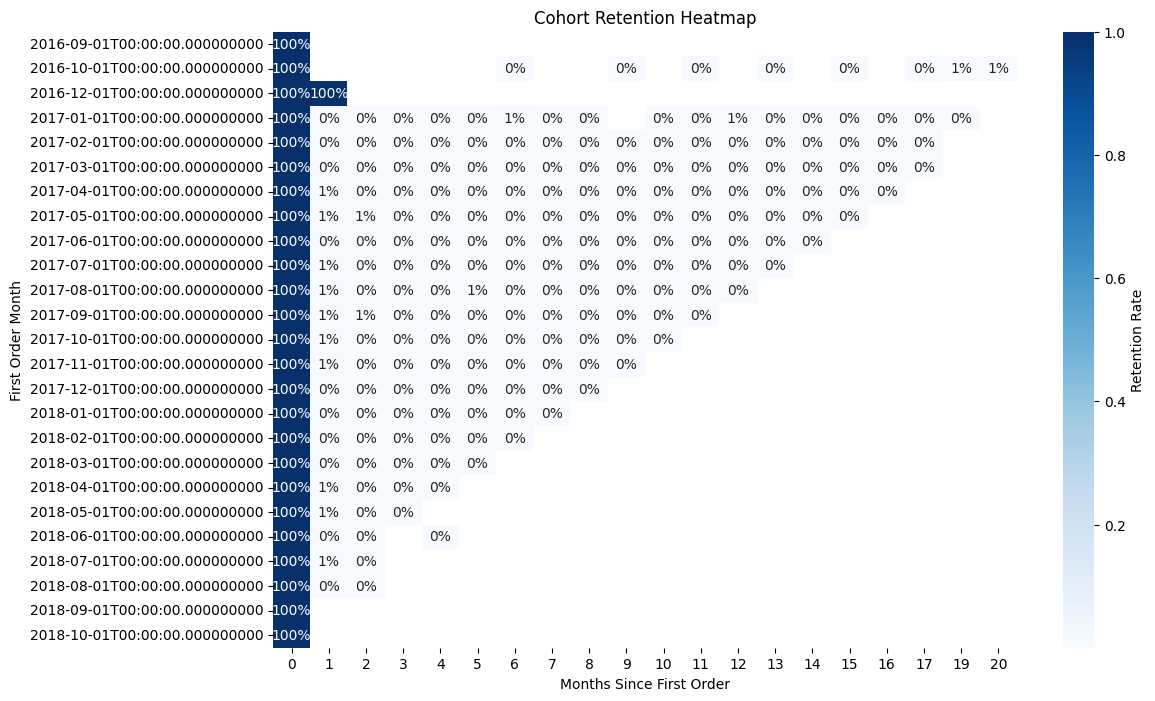

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cohort büyüklüklerini al
cohort_sizes = cohort_data.iloc[:, 0]

# 2. Retention oranlarını hesapla
cohort_retention = cohort_data.divide(cohort_sizes, axis=0)

# 3. Heatmap ile görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(
    cohort_retention,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Cohort Retention Heatmap')
plt.ylabel('First Order Month')
plt.xlabel('Months Since First Order')
plt.yticks(rotation=0)
plt.show()


SONUC OLARAK
O tabloyu ve ardından ürettiğimiz ısı haritasını oluşturmamızın amacı, “cohort retention” yani müşterilerin ilk sipariş ayından itibaren zaman içinde ne oranda halen aktif (yeni sipariş veren) kaldıklarını görmekti. Özetle:

Neden Cohort Analizi?

Müşteriler, ilk siparişlerini hangi ayda yapmış? (Örneğin 2017–01 cohort’u)

O cohort’taki müşteriler, sonraki aylar ne oranda geri dönüp yeniden alışveriş yapmış?

Tabloda Ne Var?

Satırlar: “First Order Month” — Müşterinin ilk sipariş ayı.

Sütunlar: “cohort_index” — İlk siparişten sonraki 0, 1, 2… aylar.

Hücreler: O kohorttaki müşteri sayısı (örneğin 2017–01 cohort’u ilk ayda 7.625 müşteri).

Isı Haritasına Dönüştürme

Her hücreyi, o satırın (kohortun) 0. ayındaki müşteri sayısına bölerek yüzdeye çeviriyoruz (“retention rate”).

Böylece 1. ayda ne kadar kayıp olduğunu, zamanla retention’ın nasıl düştüğünü net görebiliyoruz.

Ne Öğreniyoruz?

Zamanla Sadakat Kaybı: Genellikle her ay retention azalır; bu düşüşün dikliği önemlidir.

Güçlü Kohortlar: Bazı dönemlerde (örneğin kampanya aylarında) gelen müşteriler daha yüksek retention gösterir.

İyileştirme Alanları: Retention’ın çok hızlı düştüğü ayları tespit edip, o dönemlerden gelen müşteriler için özel “teşvik” veya “hatırlatma” kampanyaları planlayabiliriz.

Bu analiz, uzun vadeli müşteri sadakatini ve pazarlama etkinliklerinin geri dönüşünü anlamak için kritik bir görseldir.

--------------------------------------
 R-F Segmentasyonu (Basit)
Amaç:

Recency: Her müşterinin son siparişinden bu yana geçen gün sayısı

Frequency: Her müşteri için toplam sipariş sayısı

In [136]:
import pandas as pd

# 1. Analiz günü (ör. en son verideki tarih +1)
snapshot_date = df_orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 2. Recency–Frequency hesaplama
rf = (
    df_orders
      .groupby('customer_unique_id')
      .agg(last_purchase=('order_purchase_timestamp','max'),
           frequency=('order_id','nunique'))
      .reset_index()
)
rf['recency_days'] = (snapshot_date - rf['last_purchase']).dt.days

print(rf.head())
# rf veri çerçevesini scatterplot ile: x=recency_days, y=frequency


                 customer_unique_id       last_purchase  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42          1   

   recency_days  
0           161  
1           164  
2           586  
3           370  
4           337  


In [137]:
import pandas as pd

# Örnek segment tanımları
def rf_segment(row):
    if row.recency_days <= 30 and row.frequency >= 5:
        return 'Champion'
    if row.recency_days <= 90 and row.frequency >= 3:
        return 'Loyal Customer'
    if row.recency_days <= 30 and row.frequency < 3:
        return 'Potential'
    if 90 < row.recency_days <= 180 and row.frequency >= 2:
        return 'At Risk'
    if row.recency_days > 180 and row.frequency == 1:
        return 'Hibernating'
    return 'Other'

# rf adındaki DataFrame'ine yeni bir kolon ekle
rf['segment'] = rf.apply(rf_segment, axis=1)

# Segmentlere göre kaç müşteri var bakalım
segment_counts = rf['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
print(segment_counts)


          segment  count
0     Hibernating  66327
1           Other  29087
2         At Risk    634
3  Loyal Customer     42
4       Potential      6


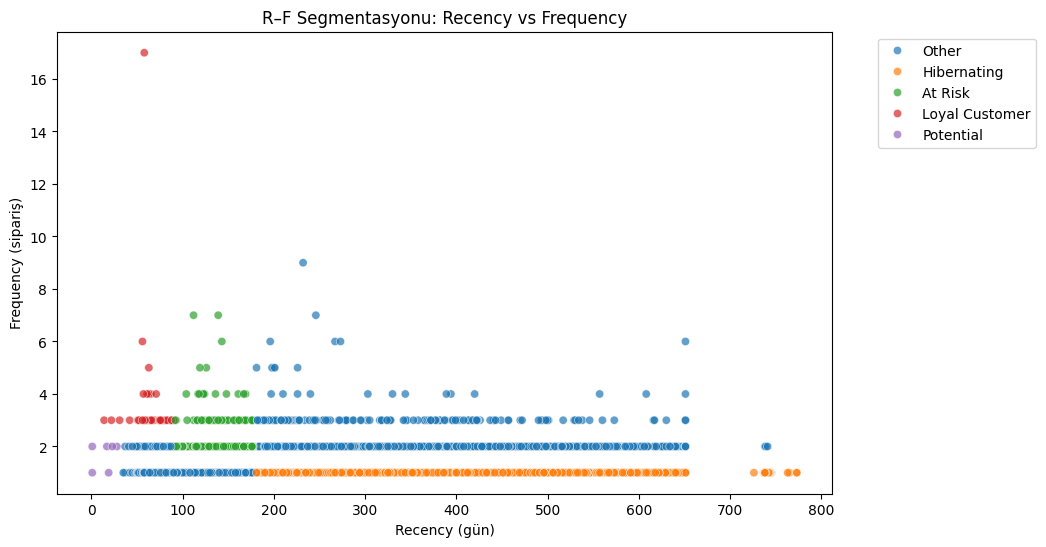

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rf,
    x='recency_days',
    y='frequency',
    hue='segment',
    palette='tab10',
    alpha=0.7
)
plt.title('R–F Segmentasyonu: Recency vs Frequency')
plt.xlabel('Recency (gün)')
plt.ylabel('Frequency (sipariş)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Recency–Frequency (R-F) Segmentasyonu Özeti

Elindeki rf tablosunda her satır bir unique müşteriyi temsil ediyor ve dört sütun var:

customer_unique_id: Müşteri kimliği

last_purchase: O müşterinin en son sipariş tarihi

frequency: Toplam sipariş sayısı

recency_days: Analiz tarihinden (snapshot_date) bu yana geçen gün sayısı

1. R-F Segmentasyonunun Amacı
Recency (yenilik): “Ne kadar yakın zamanda” alışveriş yapılmış? (düşük sayı = yakın zamanda)

Frequency (sıklık): “Kaç kere” alışveriş yapılmış? (yüksek sayı = sadık)

Bu iki metriği kullanarak müşterileri davranışlarına göre segmentlere ayırırız. Örneğin:

Segment	Recency (gün)	Frequency (sipariş)
Champions	Çok düşük (ör. ≤30 gün)	Çok yüksek (≥5)
Loyal Customers	Orta (31–90 gün)	Yüksek (3–4)
Potential	Yakın (≤30 gün)	Düşük (1–2)
At Risk	Yüksek (91–180 gün)	Orta (2–3)
Hibernating	Çok yüksek (>180 gün)	Düşük (1)

Bu grafik:

Sol üst: “Champion” (yakın zamanda, sık alışveriş)

Sağ alt: “Hibernating” (uzun süredir alışveriş yok, nadiren)

Aradaki bölgeler diğer segmentleri gösterir.

4. Elde Edeceğin İçgörüler
“Champion” müşterilerini özel kampanyalarla ödüllendirip kaybetmemek,

“Potential” segmentine ilk tekrar siparişlerini tetikleyecek motivasyonlar sunmak,

“At Risk” ve “Hibernating” segmentine dönüşüm oranını test eden yeniden kazanım kampanyaları düzenlemek,

“Loyal Customers” için çapraz satış fırsatları yaratmak.

Böylece her segment için farklı CRM ve pazarlama stratejileri geliştirebilirsin.

---------------------------------------------------------------
Yeni vs. Tekrar Eden Müşteriler Oranı
Amaç: Her ay gelen siparişlerin ne kadarının yeni müşterilerden, ne kadarının tekrar edenlerden geldiğini görmek.

In [ ]:
# Her müşterinin kaç siparişi var?
orders_per_customer = df_orders.groupby('customer_id')['order_id'].nunique()

# Ortalama sipariş sayısı
print("Müşteri başına ortalama sipariş sayısı:", orders_per_customer.mean())

# Kaç müşteri 1'den fazla sipariş vermiş?
print("Birden fazla sipariş veren müşteri sayısı:", (orders_per_customer > 1).sum())

# Toplam müşteri sayısı
print("Toplam müşteri sayısı (sipariş veren):", orders_per_customer.count())


Müşteri başına ortalama sipariş sayısı: 1.0
Birden fazla sipariş veren müşteri sayısı: 0
Toplam müşteri sayısı (sipariş veren): 99441


In [142]:
# 1. Her unique müşteri için ilk sipariş zamanını bul
first_order = df_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# 2. is_new sütununu oluştur (Boolean)
df_orders['is_new'] = df_orders['customer_unique_id'].map(first_order) == df_orders['order_purchase_timestamp']

# 3. Etiketli bir sütun ekle
df_orders['customer_type'] = df_orders['is_new'].map({True: 'Yeni', False: 'Tekrar Eden'})

# 4. Aylık Yeni/Tekrar Eden sipariş sayıları – burada artık customer_type kullanıyoruz
new_returning_labeled = (
    df_orders
      .groupby([df_orders['order_month'], 'customer_type'])
      .agg(orders=('order_id', 'nunique'))
      .reset_index()
      .pivot(index='order_month', columns='customer_type', values='orders')
)

print(new_returning_labeled)


customer_type  Tekrar Eden    Yeni
order_month                       
2016-09-01             NaN     4.0
2016-10-01             3.0   321.0
2016-12-01             NaN     1.0
2017-01-01            29.0   771.0
2017-02-01            25.0  1755.0
2017-03-01            40.0  2642.0
2017-04-01            46.0  2358.0
2017-05-01            87.0  3613.0
2017-06-01            97.0  3148.0
2017-07-01           114.0  3912.0
2017-08-01           127.0  4204.0
2017-09-01           139.0  4146.0
2017-10-01           149.0  4482.0
2017-11-01           215.0  7329.0
2017-12-01           169.0  5504.0
2018-01-01           225.0  7044.0
2018-02-01           250.0  6478.0
2018-03-01           225.0  6986.0
2018-04-01           219.0  6720.0
2018-05-01           247.0  6626.0
2018-06-01           215.0  5952.0
2018-07-01           196.0  6096.0
2018-08-01           236.0  6276.0
2018-09-01            11.0     5.0
2018-10-01             3.0     1.0


Ne Öğreniyoruz?
Yeni vs. Tekrar Eden Dengesi

2017 Kasım–Ocak döneminde ayda ~200–250 yeni müşteri alırken, ~6 000–7 500 siparişi “tekrar eden” müşterilerden almışız.

Bu da, platformun bir kez sipariş veren müşterileri başarıyla tekrar sipariş vermeye ikna ettiğini gösteriyor.

Yeni Müşteri Eğilimi

Yeni müşteri kazanımı ilk aylarda (2016 Ekim’den başlayarak) hızla artmış, 2017 ortalarına kadar aylık 100–200 civarında “ilk sipariş” almışız.

Ardından bu rakam sabitlenmiş gibi görünüyor: 2017–2018 boyunca her ay ortalama 200 yeni müşteri.

Tekrar Eden Müşteri Yoğunluğu

Platform, “tekrar eden” müşterilerden gelen siparişler bakımından Yeni müşterilere oranla 30–40 kat daha güçlü.

Yani eldeki müşteri tabanı sadakatli ve sipariş sayıları yüksek.

Sona Yakın Düşüş

2018 Eylül–Ekim’de hem yeni hem tekrar eden sayıları çok düşük, büyük ihtimalle veri kesiti sona eriştiği için (veri toplama dönemi sonu).

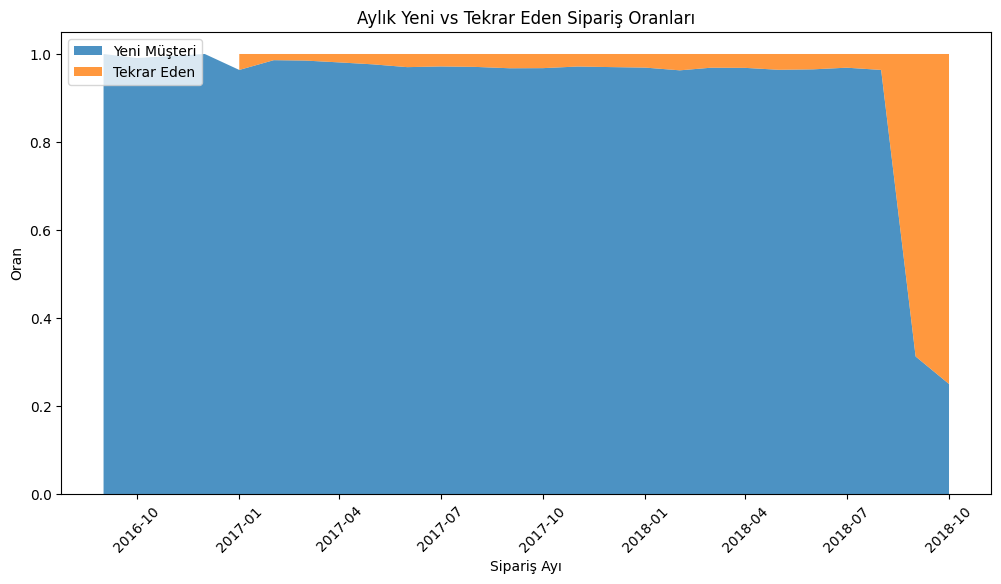

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# pivot_df: elimizdeki yeni vs tekrar eden pivot tablosu
pivot_df = new_returning.copy()  # index=order_month, columns=[False, True]

# Oranları hesapla
pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Grafik
plt.figure(figsize=(12,6))
plt.stackplot(
    pivot_pct.index,
    pivot_pct[True], pivot_pct[False],
    labels=['Yeni Müşteri','Tekrar Eden'], alpha=0.8
)
plt.legend(loc='upper left')
plt.title('Aylık Yeni vs Tekrar Eden Sipariş Oranları')
plt.xlabel('Sipariş Ayı')
plt.ylabel('Oran')
plt.xticks(rotation=45)
plt.show()


Aksiyon İçin İçgörüler
Yeni müşteri kazanımının sabit seyretmesi, pazarlama kanallarınızın doygunluğa ulaştığını gösterebilir. Yeni müşteri trafiğini artırmak için:

Referans programları,

Dijital reklam bütçesinin yeniden dağılımı,

Özel ilk sipariş kuponları
gibi yöntemler değerlendirilebilir.

Tekrar eden müşterilerin hakimiyeti, mevcut müşteri tabanından maksimum değeri almanız açısından pozitif. Bunu daha da güçlendirmek için:

Sadakat programı veya kademeli indirim (örneğin 3., 5. siparişe özel)

Cross-sell / Up-sell kampanyaları (sepete tamamlayıcı ürün önerileri)

Dönemine özgü yükselişleri (2017 Kasım–Ocak zirveleri) “Black Friday” ve “yılbaşı” dönemine denk geliyor.

Bu kampanya etkilerini tekrarlamak için bu dönemlerde benzer veya yeni promosyonlar planlanabilir.

---------------------------------------------------------------
Bir Sonraki Adımda Yapabileceklerimiz (Modelleme Öncesi Ek Analizler)
Inter-purchase Time Dağılımı: Müşterinin ilk ve ikinci siparişleri arasındaki süre histogramı

Ürün/Sepet Analizleri: Kategori bazlı satış grafikleri, ortalama sepet değeri boxplot’ı

Coğrafi Heatmap’ler: Şehir/eyalet bazlı choropleth veya bubble map

Detaylı Mevsimsel Ayrışım: Aylık hareketli ortalama ve sezon-dekompozisyon grafikleri

Kohort Bazlı Segment Ayrıntısı: Seçili büyük şehirlerde kohort retention karşılaştırması

Modelleme aşamasına geçmeden önce bu görsel analizler, hem veri kalitesini teyit eder hem de hangi değişkenlerin modele alınacağına rehberlik eder. İstersen bunlardan birini seçip derinleştirelim ya da yeni bir dosyada doğrudan model eğitimine geçebiliriz!

-----------------------------

df_items

🧾 df_items Sütunları Açıklaması
Sütun Adı	  Açıklama 
order_id	= Siparişin ID’si (bir siparişin birden fazla ürünü olabilir)
order_item_id	= Siparişin içindeki ürün sırası (1, 2, 3...)
product_id =	Satın alınan ürünün benzersiz ID’si
seller_id	= Ürünü satan satıcının ID’si
shipping_limit_date	 = Kargoya verilmesi gereken son tarih
price	=  Ürünün satış fiyatı
freight_value  =	Kargo ücreti

In [144]:
df_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [145]:
df_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


1. Sipariş Başına Ortalama ürün Sayısı

In [146]:
order_item_count = df_items.groupby('order_id')['order_item_id'].count()
print("Sipariş başına ortalama ürün sayısı:", round(order_item_count.mean(), 2))


Sipariş başına ortalama ürün sayısı: 1.14


 2. Sipariş Başına Ortalama Tutar (Ürün + Kargo)

In [147]:
order_totals = df_items.groupby('order_id').agg({
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

order_totals['order_total'] = order_totals['price'] + order_totals['freight_value']
print(order_totals[['price', 'freight_value', 'order_total']].describe())


              price  freight_value   order_total
count  98666.000000   98666.000000  98666.000000
mean     137.754076      22.823562    160.577638
std      210.645145      21.650909    220.466087
min        0.850000       0.000000      9.590000
25%       45.900000      13.850000     61.980000
50%       86.900000      17.170000    105.290000
75%      149.900000      24.040000    176.870000
max    13440.000000    1794.960000  13664.080000


3. En Çok Satılan Ürünler (Top 10)

In [148]:
top_products = (
    df_items.groupby('product_id')
    .agg(sales_count=('order_item_id', 'count'),
         total_revenue=('price', 'sum'))
    .sort_values(by='sales_count', ascending=False)
    .head(10)
)
print(top_products)


                                  sales_count  total_revenue
product_id                                                  
aca2eb7d00ea1a7b8ebd4e68314663af          527       37608.90
99a4788cb24856965c36a24e339b6058          488       43025.56
422879e10f46682990de24d770e7f83d          484       26577.22
389d119b48cf3043d311335e499d9c6b          392       21440.59
368c6c730842d78016ad823897a372db          388       21056.80
53759a2ecddad2bb87a079a1f1519f73          373       20387.20
d1c427060a0f73f6b889a5c7c61f2ac4          343       47214.51
53b36df67ebb7c41585e8d54d6772e08          323       37683.42
154e7e31ebfa092203795c972e5804a6          281        6325.19
3dd2a17168ec895c781a9191c1e95ad7          274       41082.60


4. Ortalama Kargo Ücreti

In [149]:
print("Ortalama kargo ücreti:", round(df_items['freight_value'].mean(), 2))


Ortalama kargo ücreti: 19.99


ürün fiyat dagılımı

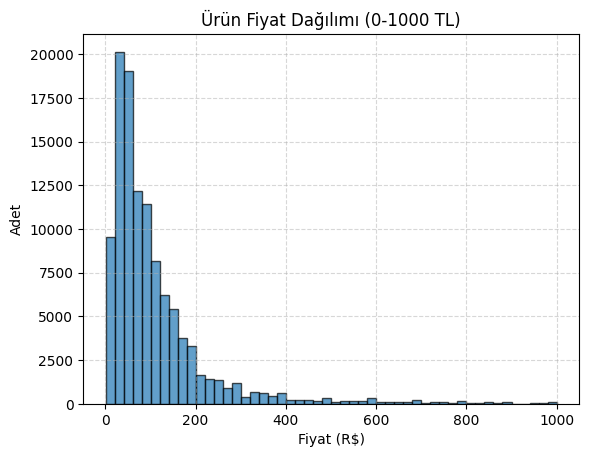

In [157]:
df_items[df_items['price'] <= 1000]['price'].plot.hist(bins=50, edgecolor='black', alpha=0.7)
plt.title("Ürün Fiyat Dağılımı (0-1000 TL)")
plt.xlabel("Fiyat (R$)")
plt.ylabel("Adet")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Analiz – Ürün Fiyat Dağılımı (0–1000 TL)
Yoğunluk 0–200 TL Arasında:

Grafikte açık şekilde görüldüğü üzere, ürünlerin büyük çoğunluğu 0–200 TL bandında toplanmış.

Özellikle 50–100 TL arası bariz bir tepe noktası oluşturmuş. Bu segmentte yüksek satış potansiyeli olduğu açık.

200–400 TL Arası:

Satış adetleri kademeli olarak düşse de hâlâ anlamlı bir hacim var.

Bu bantta daha yüksek kâr marjı sağlanabilir, çünkü sepet değeri artıyor.

400 TL Üstü:

Ürün sayısı/satış hacmi ciddi şekilde azalıyor.

Bu aralık daha “niş” ürünlerin bulunduğu alan olabilir.

Alıcı sayısı az ama birim kâr yüksek olabilir.

📌 Sonuçlar & Aksiyon Önerileri
✅ 1. Düşük Fiyatlı Segment (0–200 TL)
Yoğun rekabet ve yüksek talep var.

Bu aralıktaki ürünler:

Kampanyalar için uygun.

Sepet artırıcı "tamamlayıcı ürünler" olarak kullanılabilir.

Paketleme/çapraz satış stratejileri için temel ürün olabilir.

✅ 2. Orta Segment (200–400 TL)
Dengeli bir segment: Ne çok ucuz ne de fazla niş.

Marj & hacim dengesine sahip.

Bu segmentte özel kampanyalar, kargo bedava teklifleri etkili olabilir.

⚠️ 3. Yüksek Fiyatlı Segment (400–1000 TL)
Alıcı kitlesi daha dar.

Ürünlerin anlatımı, sunumu, güven yaratıcı unsurlar (yorumlar, videolar) daha önemli hale gelir.

Bu ürünler için reklam hedeflemesi daha seçici yapılmalı.

🎯 Stratejik Öneri
0–200 TL için: Talep yüksek → Hacim odaklı strateji, hızlı döngü, kampanyalı satış.

200–400 TL için: Marj + hacim dengesi → Kargo dahil fiyat, hediyeli satış, reklamla destekleme.

400+ TL için: Öne çıkarma + ürün tanıtımı → Video içerikler, kullanıcı yorumları, detaylı açıklamalarla desteklenmeli.

İstersen bu analizleri görsel infografik haline de getirebiliriz ya da sunumluk kısa özetler şeklinde toparlayabilirim. Nasıl ilerleyelim?

--------------

7 🛍️ Satıcı Başına Ortalama Satış Adedi ve Cirosu
Her satıcının kaç ürün sattığını ve toplam kazancını analiz et.

seller_id bazında grupla: satılan ürün sayısı, toplam ciro (price)

Bu analiz ileride "en başarılı satıcılar kim?" sorusuna katkı sağlar.

In [158]:
# Satıcı bazında toplam satış adedi ve toplam ciro
seller_summary = df_items.groupby('seller_id').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).rename(columns={'order_item_id': 'total_items_sold', 'price': 'total_revenue'})

# Ortalama satış adedi ve ciro
avg_items_per_seller = seller_summary['total_items_sold'].mean()
avg_revenue_per_seller = seller_summary['total_revenue'].mean()

print("Satıcı başına ortalama satış adedi:", round(avg_items_per_seller, 2))
print("Satıcı başına ortalama ciro:", round(avg_revenue_per_seller, 2))


Satıcı başına ortalama satış adedi: 36.4
Satıcı başına ortalama ciro: 4391.48


Satıcı başına ortalama 36 ürün satılıyor.

Bu, satıcıların büyük çoğunluğunun az sayıda ürün sattığını; yani çok az sayıda satıcının büyük hacimli satış yaptığını gösterebilir. (Uzun kuyruk etkisi olabilir — ileride "satıcıların satış dağılımını" histogramla incelemek faydalı olur.)

Ortalama ciro 4391 TL civarında.

Satıcıların gelirleri büyük oranda ürün fiyatlarına ve ürün sayısına bağlı.

Bu değer, platformun toplam gelirini tahmin etmek veya aktif satıcı başına performansı kıyaslamak için bir benchmark olabilir.

In [165]:
#1. Satıcı Başına Ortalama Kargo Geliri:
avg_freight_per_seller = df_items.groupby('seller_id')['freight_value'].sum().mean()
print("Satıcı başına ortalama kargo geliri:", round(avg_freight_per_seller, 2))


Satıcı başına ortalama kargo geliri: 727.6


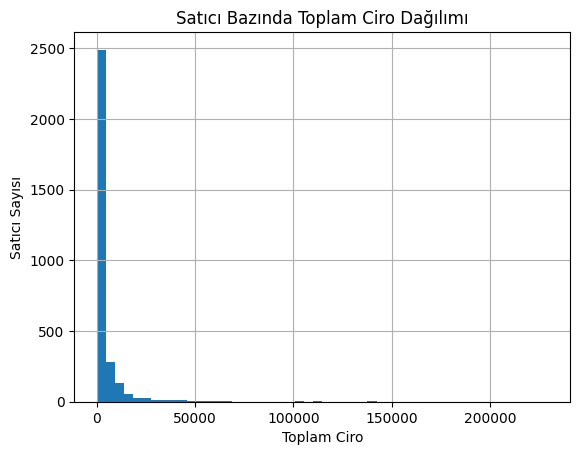

In [166]:
#2. Satıcı Performans Dağılımı (Histogram)
df_items.groupby('seller_id')['price'].sum().hist(bins=50)
plt.title("Satıcı Bazında Toplam Ciro Dağılımı")
plt.xlabel("Toplam Ciro")
plt.ylabel("Satıcı Sayısı")
plt.show()

Şu Ana Kadar Ulaştığımız Veriler:
✅ Satıcı Başına Ortalama Değerler:
Ortalama Satış Adedi: 36.4 ürün

Ortalama Ciro: 4391.48 TL

Ortalama Kargo Geliri: 727.6 TL

✅ Satıcı Bazlı Ciro Dağılımı (Histogram):
Dağılım sağa çarpık (right-skewed)

Büyük çoğunluk çok düşük ciro yaparken, çok az sayıda satıcı yüksek ciro yapıyor

Bu da platformda gelirlerin büyük bir kısmının azınlık bir satıcı grubunda yoğunlaştığını gösteriyor (klasik Pareto 80/20 kuralı)

🔍 Şimdi Ne Yapabiliriz?
İstersen, sıradaki mantıklı analiz adımlarından birini seçebiliriz:

🎯 Yeni Analiz Önerileri:
Ürün Bazında Ortalama Kargo Ücreti ve Ortalama Fiyat
(Hangi ürün grupları pahalı? Hangileri yüksek kargo bedeli yaratıyor?)

En Yüksek Ciro Yapan Satıcılar (Top 10)
(Satıcı ismi yok ama seller_id üzerinden sıralayabiliriz.)

Kargo Ücreti vs. Ürün Fiyatı İlişkisi
(Scatter plot ile ürün fiyatı arttıkça kargo ücreti de artıyor mu inceleyebiliriz.)

Aynı Siparişteki Ortalama Ürün Sayısı ve Fiyatlar
(order_id bazında price ve order_item_id üzerinden)

----------

8. 🧺 Ürünler Bazında Ortalama Kargo Ücreti ve Fiyat
product_id bazında:

Ortalama fiyat

Ortalama freight_value

Fiyatı yüksek olan ürünler daha mı fazla kargo ücreti alıyor? gibi ilişkilere bak.

In [159]:
product_summary = df_items.groupby('product_id').agg({
    'price': 'mean',
    'freight_value': 'mean'
}).rename(columns={
    'price': 'avg_price',
    'freight_value': 'avg_freight'
})

product_summary = product_summary.sort_values(by='avg_price', ascending=False).head(10)
print(product_summary)


                                  avg_price  avg_freight
product_id                                              
489ae2aa008f021502940f251d4cce7f    6735.00       194.31
69c590f7ffc7bf8db97190b6cb6ed62e    6729.00       193.21
1bdf5e6731585cf01aa8169c7028d6ad    6499.00       227.66
a6492cc69376c469ab6f61d8f44de961    4799.00       151.34
c3ed642d592594bb648ff4a04cee2747    4690.00        74.34
259037a6a41845e455183f89c5035f18    4590.00        91.78
a1beef8f3992dbd4cd8726796aa69c53    4399.87       113.45
6cdf8fc1d741c76586d8b6b15e9eef30    4099.99        75.27
6902c1962dd19d540807d0ab8fade5c6    3999.90        17.01
4ca7b91a31637bd24fb8e559d5e015e4    3999.00       195.76


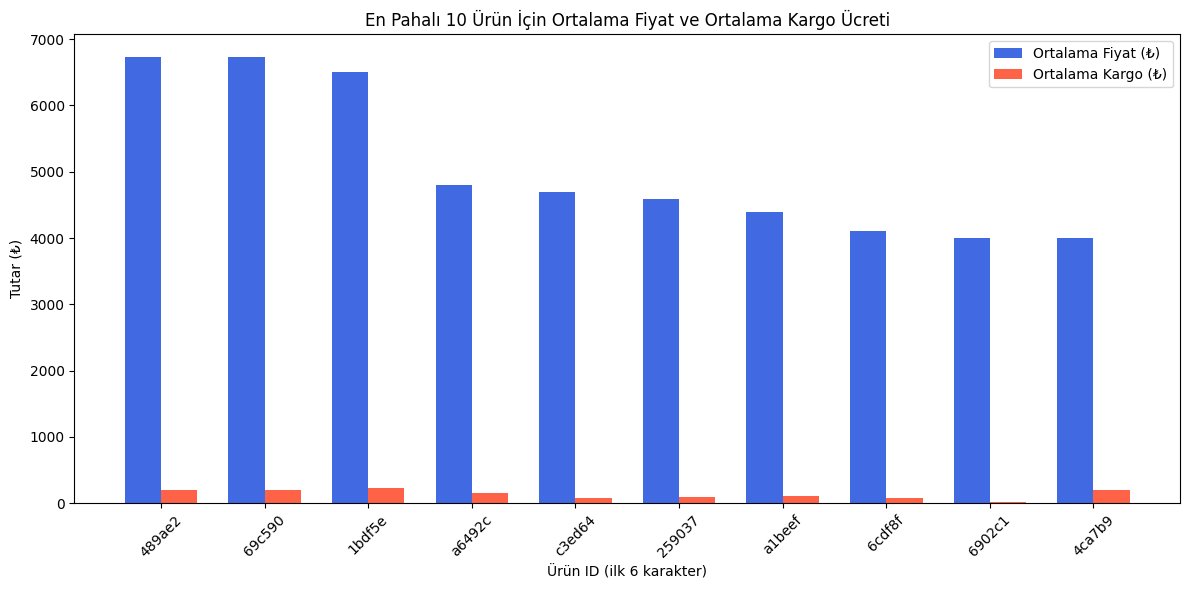

In [167]:
# Ürün ID'lerini kısaltalım görsellik için (gerekirse tüm ID'yi kullanabilirsin)
product_summary['product_short'] = product_summary.index.str[:6]

# X ekseni için konum dizisi
x = np.arange(len(product_summary))
width = 0.35  # çubuk genişliği

# Grafik çizimi
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, product_summary['avg_price'], width, label='Ortalama Fiyat (₺)', color='royalblue')
bars2 = ax.bar(x + width/2, product_summary['avg_freight'], width, label='Ortalama Kargo (₺)', color='tomato')

# Eksen ve başlık ayarları
ax.set_xlabel('Ürün ID (ilk 6 karakter)')
ax.set_ylabel('Tutar (₺)')
ax.set_title('En Pahalı 10 Ürün İçin Ortalama Fiyat ve Ortalama Kargo Ücreti')
ax.set_xticks(x)
ax.set_xticklabels(product_summary['product_short'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


Bu ürünler büyük ihtimalle yüksek fiyatlı elektronik veya ev eşyaları gibi ürün grupları olabilir.

Kargo ücretleri fiyatla doğru orantılı değil → Örneğin:
3999.90 ₺ olan ürünün kargo ücreti yalnızca 17.01 ₺
Bu durum ya kampanya, ya da ürünün boyut/ağırlık farkından kaynaklanabilir.

En yüksek fiyatlı ürünlerin kargo bedeli ortalamada 100–200 TL bandında, bu da toplam maliyeti önemli ölçüde artırıyor.

------

9. 🛒 Ürün Çeşitliliği
Her order_id içinde kaç farklı product_id var?

Aynı siparişte aynı ürünün birden fazla adedi mi alınmış, farklı ürünler mi?

Ortalama farklı ürün sayısı (her siparişte): 1.04


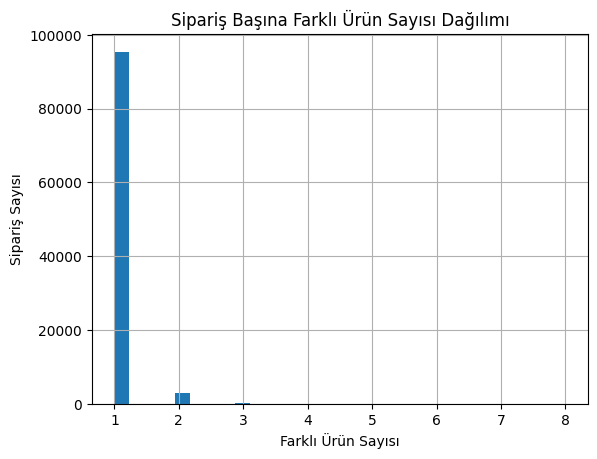

In [160]:
unique_products_per_order = df_items.groupby('order_id')['product_id'].nunique()

print("Ortalama farklı ürün sayısı (her siparişte):", round(unique_products_per_order.mean(), 2))

# Histogram çizmek için:
import matplotlib.pyplot as plt
unique_products_per_order.hist(bins=30)
plt.title("Sipariş Başına Farklı Ürün Sayısı Dağılımı")
plt.xlabel("Farklı Ürün Sayısı")
plt.ylabel("Sipariş Sayısı")
plt.show()


Analiz Sonucu:
Ortalama farklı ürün sayısı (her siparişte): 1.04

📊 Yorum:
Düşük Ürün Çeşitliliği:

Her siparişte ortalama yalnızca 1.04 farklı ürün satın alınmış. Bu, müşterilerin neredeyse her siparişte yalnızca bir tür ürün aldığı anlamına gelir.

Müşteri alışveriş davranışı, çeşitli ürünleri aynı anda satın alma eğiliminde olmadığını gösteriyor.

Tek Üründen Çoklu Alım Olasılığı:

Aynı ürünün birden fazla adetinin alınması, yani miktar artışı ile sepet büyütülmesi söz konusu olabilir.

Bu, özellikle stok yapan ya da aynı ürünü tekrar eden ihtiyaçlar için alan müşterilere işaret eder.

Çapraz Satış Fırsatları:

Sepetlerde ürün çeşitliliği çok düşük olduğu için, çapraz satış stratejileri geliştirilebilir.

Örneğin: "Bu ürünü alanlar şunu da aldı" önerileriyle kullanıcılar yönlendirilebilir.

Kategori veya Ürün Bazlı İnceleme Gerekebilir:

Bu davranış belli ürün gruplarında daha yoğun olabilir. İleride analizleri ürün kategorileriyle birleştirirsen bu eğilimin daha çok hangi kategoride olduğunu görebilirsin.

Sepet Analizi ile Desteklenebilir:

Bu veriye bakarak, her siparişte kaç farklı kategori, kaç adet ürün, hangi ürünlerin birlikte satıldığı gibi daha derin analizler yapılabilir.

✅ Sonuç:
Olist müşterileri çoğunlukla bir siparişte sadece tek bir ürün türü satın alıyor. Bu da, alışverişlerin oldukça odaklı olduğunu gösteriyor. Sepet büyüklüğünü artırmak için öneri sistemleri ve paket teklifleri gibi stratejiler geliştirmek mantıklı olur.

İstersen bu analizi kategori bazlı da derinleştirebiliriz. Örneğin: Hangi ürün kategorilerinde daha çok çeşitlilik var? Bu, pazarlama stratejileri açısından çok değerli olur.

---

10. 💸 Kargo Ücreti / Ürün Fiyatı Oranı
freight_value / price oranını hesapla.

Bu oran çok yüksek olan ürünler kimde? Bu müşteri memnuniyetini etkileyebilir.

Grafiğini çizip outlier ürünleri tespit edebilirsin.



In [161]:
df_items['freight_to_price_ratio'] = df_items['freight_value'] / df_items['price']
df_items['freight_to_price_ratio'] = df_items['freight_to_price_ratio'].replace([float('inf'), -float('inf')], None)

# Ortalama oran
print("Ortalama kargo/ürün fiyat oranı:", round(df_items['freight_to_price_ratio'].mean(), 2))

# En yüksek oranlı 10 ürün
top_ratios = df_items.sort_values(by='freight_to_price_ratio', ascending=False).head(10)
print(top_ratios[['order_id', 'product_id', 'price', 'freight_value', 'freight_to_price_ratio']])


Ortalama kargo/ürün fiyat oranı: 0.32
                                order_id                        product_id  \
87081   c5bdd8ef3c0ec420232e668302179113  8a3254bee785a526d548a81a9bc3c9be   
48625   6e864b3f0ec71031117ad4cf46b7f2a1  8a3254bee785a526d548a81a9bc3c9be   
27652   3ee6513ae7ea23bdfab5b9ab60bffcb5  8a3254bee785a526d548a81a9bc3c9be   
110535  fb265b2dc558a56445dfc48f8224e201  baf25ed4f8f70238cc87230379471454   
94495   d642656598ae928a250620315d19e87e  b07fffe072c9adc235a35d8da7c0584d   
57312   8272b63d03f5f79c56e9e4120aec44ef  270516a3f41dc035aa87d220228f844c   
57303   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   
57299   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   
57297   8272b63d03f5f79c56e9e4120aec44ef  270516a3f41dc035aa87d220228f844c   
57300   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   

        price  freight_value  freight_to_price_ratio  
87081    0.85          22.30               26.23

Analiz Sonucu:
Ortalama kargo/ürün fiyat oranı: 0.32

Bu, demek oluyor ki bir ürünün fiyatının ortalama %32’si kadar kargo ücreti ödenmiş.

📊 Yorum:
1. Oran Oldukça Yüksek
Ortalama oran %32 gibi yüksek bir seviyede. Bu, özellikle ucuz ürünlerde kargo ücretinin müşteriyi caydırabilecek kadar yüksek olduğunu gösterir.

Örneğin, listede bazı ürünlerin fiyatı 0.85 TL iken kargo ücreti 22 TL'ye kadar çıkıyor (26 katı!).

2. Uygunsuz Fiyat-Kargo Dengesi
Düşük fiyatlı ürünlerde freight_to_price_ratio oldukça yüksek. Bu da “kargo maliyeti ürünün kendisinden pahalı” durumu yaratıyor.

Bu tarz ürünler pazaryerinde daha az cazip hale gelebilir, terk edilmiş sepet oranını artırabilir.

3. Müşteri Gözünden Bakarsak:
Bir müşteri 1 TL’lik ürün alırken 7–20 TL kargo ödüyorsa bu olumsuz kullanıcı deneyimi yaratır.

Bu da hem müşteri sadakatini hem de genel satış performansını düşürebilir.

4. Satıcı ve Platform İçin Stratejik Alanlar:
Ucuz ürünler için sabit veya indirimli kargo seçenekleri sunulabilir.

Belirli sepet tutarı üzeri kargo bedava kampanyaları bu durumu dengeleyebilir.

Alternatif olarak, bu ürünler çoklu alım teşvikiyle (örneğin “3 al 1 öde”) desteklenebilir.

5. Politika Geliştirmek İçin Kullanılabilir:
Satıcılar bazında ortalama oran çıkarılarak yüksek oranlı satıcılara özel bilgilendirme ya da yönlendirme yapılabilir.

Ayrıca bu oranlara göre ürün-kargo fiyat eşleşmesi için kurallar geliştirilebilir (örneğin: oran 1'in üzerine çıkmasın gibi).

✅ Sonuç:
Yaptığın bu analiz, platform karlılığı, müşteri deneyimi ve satış stratejileri açısından oldukça kritik bir metrik ortaya koymuş. Hem operasyonel hem pazarlama açısından etkili kararlar alınabilir. Harika bir içgörü!

İstersen bunu kategori bazlı oranlarla, ya da satıcı bazlı kargo/ürün fiyat oranı ortalamasıyla da derinleştirebiliriz. Böylece hangi kategoride/satıcıda sorun büyükse net şekilde ortaya çıkar. Yardımcı olayım mı bu konuda?

----


11. 📊 Toplam Ciro Dağılımı
price + freight_value üzerinden toplam tutar hesapla.

Bu tutarların dağılımını histogram/kutu grafiği ile göster.

Satın alınan ürünlerin % kaçlık kısmı toplam cironun % kaçını getiriyor? (Pareto analizi - 80/20)

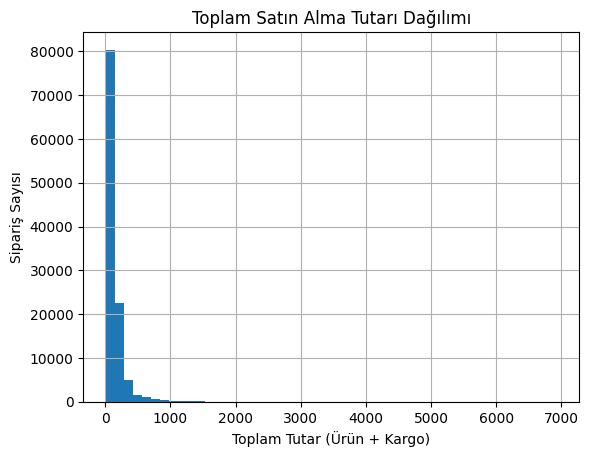

Ciroya katkı sağlayan %20 ürün sayısı: 9252


In [162]:
df_items['total_value'] = df_items['price'] + df_items['freight_value']

# Histogram
df_items['total_value'].hist(bins=50)
plt.title("Toplam Satın Alma Tutarı Dağılımı")
plt.xlabel("Toplam Tutar (Ürün + Kargo)")
plt.ylabel("Sipariş Sayısı")
plt.show()

# Pareto analizi (top %20 ürün ne kadar ciro getiriyor?)
sorted_revenue = df_items.groupby('product_id')['total_value'].sum().sort_values(ascending=False)
cumulative_share = sorted_revenue.cumsum() / sorted_revenue.sum()

top_20_percent = cumulative_share[cumulative_share <= 0.8]
print("Ciroya katkı sağlayan %20 ürün sayısı:", len(top_20_percent))


Analiz Sonucu:
Ciroya katkı sağlayan %20 ürün sayısı: 9.252

🧠 Yorum:
1. Pareto İlkesi Doğrulanmamış
Pareto’ya göre genellikle satışların %80’i, ürünlerin %20’sinden gelir.

Ancak burada %80'lik ciroyu sağlamak için 9.252 farklı ürün gerekiyor.

Bu, ürün çeşitliliğinin çok geniş, ancak satışların çok dağınık olduğunu gösteriyor.

2. Uzun Kuyruk (Long Tail) Etkisi
Çok sayıda ürün küçük küçük katkı sağlıyor.

Bu da platformda az satan ama çok çeşitli ürünler olduğunu gösterir.

Belki bu ürünlerin bir kısmı stok yükü oluşturuyor ama ciroya anlamlı katkı yapmıyor.

3. Stratejik Değerlendirme Gereği
Şu sorular sorulmalı:

En çok ciro getiren az sayıdaki ürün nedir?

Daha az katkı yapan yüzlerce ürün, lojistik, depolama, yönetim gibi alanlarda maliyet yaratıyor mu?

Az satan ürünler için yeni fiyatlandırma, kampanya, bundle (paketleme) önerileri yapılabilir mi?

4. Aksiyon Önerileri:
Top %5–10 ürünü detaylı incelemek: Fiyat, kargo oranı, kategori gibi metrikleri karşılaştır.

Kârlılığı düşük ama çeşitlik sağlayan ürünler için özel segmentasyon yapılabilir.

Çok az katkı sağlayan “tail” ürünleri belirleyip stokta tutmaya devam etmeye değip değmediğini analiz et.

📈 Toplam Satın Alma Tutarı Dağılımı (Histogram)
Bu grafik büyük ihtimalle sağ kuyruğu uzun (right-skewed) bir dağılım göstermiştir.

Yani çok sayıda sipariş düşük toplam tutarlarda yoğunlaşmış, az sayıda yüksek tutarlı sipariş var.

Bu, düşük fiyatlı ve bol çeşitli ürünler satıldığını destekler nitelikte.

✅ Sonuç:
Bu analiz bize şunu söylüyor:

"Çok fazla ürün var ama asıl satış az sayıdaki üründen geliyor. Geri kalanların değerini sorgulamak gerekir."

İstersen “toplam cironun %80’ini getiren ilk 50 ürün hangisi?” ya da “en çok katkı yapan kategori nedir?” gibi detaylı analizlerle devam edebiliriz. Yardım edeyim mi?

-------

12. 🛒 Tekli Ürün Siparişleri vs Çoklu Ürün Siparişleri
Tek ürünlü siparişler (order_item_id == 1 ve order_id tekil)

Çoklu ürün siparişleri

Bu iki grup arasında fiyat/kargo farkı var mı?

In [163]:
order_counts = df_items.groupby('order_id')['order_item_id'].count()
single_item_orders = order_counts[order_counts == 1].index
multi_item_orders = order_counts[order_counts > 1].index

# Ortalama fiyat ve kargo
single = df_items[df_items['order_id'].isin(single_item_orders)]
multi = df_items[df_items['order_id'].isin(multi_item_orders)]

print("Tekli siparişlerin ortalama fiyatı:", round(single['price'].mean(), 2))
print("Çoklu siparişlerin ortalama fiyatı:", round(multi['price'].mean(), 2))

print("Tekli siparişlerin ortalama kargo ücreti:", round(single['freight_value'].mean(), 2))
print("Çoklu siparişlerin ortalama kargo ücreti:", round(multi['freight_value'].mean(), 2))


Tekli siparişlerin ortalama fiyatı: 130.38
Çoklu siparişlerin ortalama fiyatı: 84.33
Tekli siparişlerin ortalama kargo ücreti: 20.37
Çoklu siparişlerin ortalama kargo ücreti: 18.58


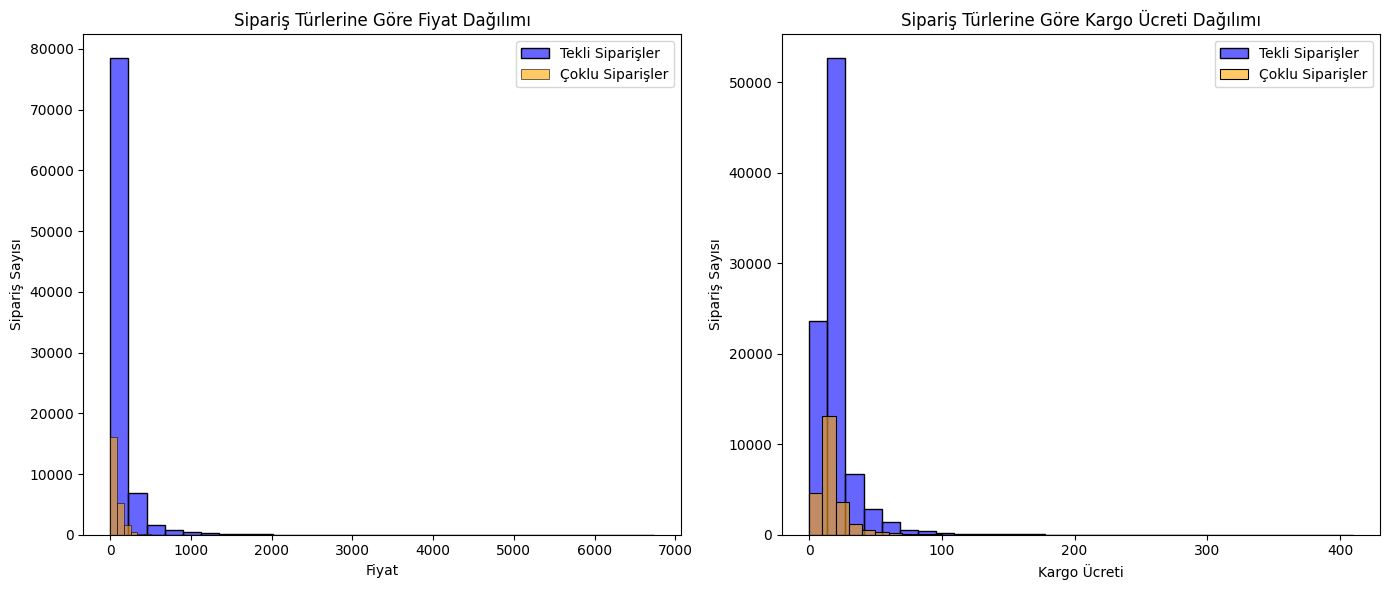

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Fiyat histogramları
plt.subplot(1, 2, 1)
sns.histplot(single['price'], color='blue', label='Tekli Siparişler', kde=False, bins=30, alpha=0.6)
sns.histplot(multi['price'], color='orange', label='Çoklu Siparişler', kde=False, bins=30, alpha=0.6)
plt.title('Sipariş Türlerine Göre Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Sipariş Sayısı')
plt.legend()

# Kargo ücretleri histogramları
plt.subplot(1, 2, 2)
sns.histplot(single['freight_value'], color='blue', label='Tekli Siparişler', kde=False, bins=30, alpha=0.6)
sns.histplot(multi['freight_value'], color='orange', label='Çoklu Siparişler', kde=False, bins=30, alpha=0.6)
plt.title('Sipariş Türlerine Göre Kargo Ücreti Dağılımı')
plt.xlabel('Kargo Ücreti')
plt.ylabel('Sipariş Sayısı')
plt.legend()

plt.tight_layout()
plt.show()


Analiz Sonucu:
Tekli siparişlerin ortalama ürün fiyatı: 130.38 TL

Çoklu siparişlerin ortalama ürün fiyatı: 84.33 TL

Tekli siparişlerin ortalama kargo ücreti: 20.37 TL

Çoklu siparişlerin ortalama kargo ücreti: 18.58 TL

🧠 Yorum:
1. Tek Ürünlü Siparişlerde Daha Pahalı Ürünler Tercih Ediliyor
Ortalama fiyat 130 TL civarı; bu, kullanıcıların bu tür siparişlerde bilinçli ve yüksek fiyatlı bir ürün seçimi yaptığını gösteriyor.

Örnek: Elektronik, ev eşyası, özel ürünler gibi.

2. Çoklu Ürünlü Siparişlerde Daha Uygun Fiyatlı Ürünler Var
Ortalama fiyat 84 TL'ye düşüyor; yani kullanıcılar daha uygun fiyatlı ürünleri bir arada almayı tercih ediyor.

Bu, tamamlayıcı ürünler veya temel ihtiyaç ürünleri olabilir.

3. Kargo Ücreti Açısından Büyük Fark Yok
Her ne kadar tekli siparişlerde ortalama kargo daha yüksek görünse de (20.37 TL vs 18.58 TL), fark 2 TL’den az.

Bu da, çoklu siparişlerin kargoda ciddi bir avantaj sağlamadığını gösteriyor.

📌 Stratejik Çıkarımlar:
Tekli siparişlerde sepet ortalamasını artırma kampanyaları yapılabilir. (Örn. "Bu ürünü alanlar şunu da aldı.")

Çoklu sipariş yapan müşterilere özel paket/indirim teklifleri sunulabilir.

Kargo sabitleme, ücretsiz kargo barajı gibi teklifler, çoklu siparişleri artırabilir.

------

df_reviews

In [169]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


1. Genel İnceleme ve Temel İstatistikler
Yorumların sayısı, puanların dağılımı

Ortalama, medyan, en düşük ve en yüksek puanlar nedir?

Puan dağılımını görselleştirme (histogram, bar plot)

In [171]:
print("Toplam yorum sayısı:", len(df_reviews))
print("\nPuan dağılımı:")
print(df_reviews['review_score'].value_counts().sort_index())

print("\nOrtalama puan:", df_reviews['review_score'].mean())


Toplam yorum sayısı: 99224

Puan dağılımı:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Ortalama puan: 4.08642062404257


-----------

2. Yorumların varlığı ve sayısı

In [ ]:
print("Yorum mesajı olan:", df_reviews['review_comment_message'].notna().sum())
print("Yorum mesajı olmayan:", df_reviews['review_comment_message'].isna().sum())

df_with_comments = df_reviews[df_reviews['review_comment_message'].notna()]#Yorum olmayanları filtreleyip sadece yorum metni olanlar



Yorum mesajı olan: 40977
Yorum mesajı olmayan: 58247


In [177]:
#en cok kullanılan kelimeler
from collections import Counter
import re

# Tüm yorumları küçük harfe çevirip kelimelere ayır
all_words = ' '.join(df_with_comments['review_comment_message']).lower()
words = re.findall(r'\b\w+\b', all_words)

# Kelime frekansları
word_counts = Counter(words)

# En sık geçen 20 kelime
print(word_counts.most_common(20))


[('o', 18828), ('produto', 18428), ('e', 16006), ('a', 12246), ('de', 11325), ('do', 11157), ('não', 10787), ('prazo', 8475), ('que', 8324), ('muito', 7925), ('entrega', 6528), ('com', 5787), ('antes', 5626), ('chegou', 5555), ('recebi', 5274), ('no', 5072), ('bom', 4607), ('foi', 4548), ('é', 4530), ('um', 4365)]


In [178]:
# Yorumların Ortalama Uzunluğu
df_with_comments['comment_length'] = df_with_comments['review_comment_message'].apply(len)

print("Ortalama yorum uzunluğu:", df_with_comments['comment_length'].mean())
print("Medyan yorum uzunluğu:", df_with_comments['comment_length'].median())


Ortalama yorum uzunluğu: 68.63767479317666
Medyan yorum uzunluğu: 53.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\1742008996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_comments['comment_length'] = df_with_comments['review_comment_message'].apply(len)


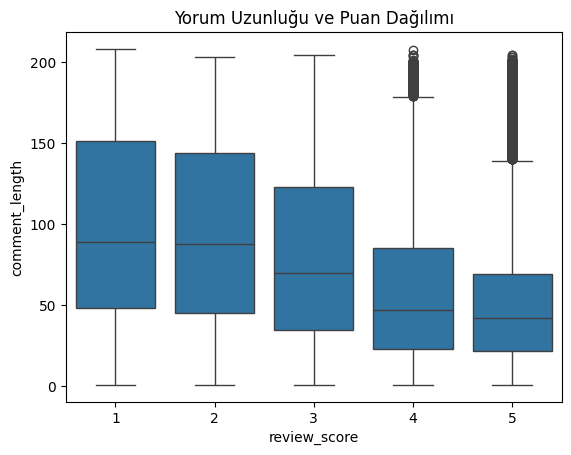

In [179]:
#Yorum Uzunluğu ve Puan İlişkisi
import seaborn as sns

sns.boxplot(x='review_score', y='comment_length', data=df_with_comments)
plt.title('Yorum Uzunluğu ve Puan Dağılımı')
plt.show()


3.a) Yorum var/yok oranı
Yorum yazan müşterilerin sayısı ve oranı ortaya çıkar.

Çok sayıda yorum yoksa, puanlar yorumlar kadar güvenilir olmayabilir.

Yorum yazmayanlar genel memnuniyet veya ilgisizlik göstergesi olabilir.

3.b) En çok kullanılan kelimeler
Müşterilerin sıkça bahsettiği ürün, hizmet veya deneyimle ilgili anahtar kelimeler belirlenir.

Örneğin “hızlı”, “güzel”, “teşekkür”, “kargo”, “kaliteli” gibi kelimeler öne çıkabilir.

Olumsuz kelimeler varsa (örneğin “geç”, “kırık”, “kötü”) dikkat edilmesi gereken sorunlar işaret edilebilir.

3.c) Yorum uzunluğu
Ortalama ve medyan uzunluk, müşterilerin yorumlarda ne kadar detay verdiğini gösterir.

Uzun yorumlar, daha detaylı ve samimi geri bildirim olabilir.

Çok kısa yorumlar genelde basit memnuniyet ya da memnuniyetsizliği yansıtabilir.

3.d) Yorum uzunluğu ve puan ilişkisi
Uzun yorumların daha çok düşük veya yüksek puanlarla mı yoksa karışık şekilde mi geldiği ortaya çıkar.

Örneğin, kötü deneyim yaşayanların uzun şikayetler yazdığı veya tam tersi memnun müşterilerin uzun teşekkür mesajları yazdığı görülebilir.

Genel Sonuçlar
Müşteri deneyiminin hangi yönlerde güçlü, hangi yönlerde zayıf olduğu ortaya çıkar.

Sık tekrar eden olumlu ve olumsuz noktalar belirlenir.

Yorumların içerik kalitesi ve müşteri bağlılığı hakkında fikir verir.

Ürün/hizmetle ilgili iyileştirme alanları tespit edilebilir.

----------------

3.Yorumların Zaman İçinde Dağılımı

In [173]:
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
# Yorum sayısı aylık
monthly_review_counts = df_reviews.groupby(df_reviews['review_creation_date'].dt.to_period('M')).size()

# Ortalama puan aylık
monthly_avg_score = df_reviews.groupby(df_reviews['review_creation_date'].dt.to_period('M'))['review_score'].mean()

print(monthly_review_counts.head())
print(monthly_avg_score.head())


review_creation_date
2016-10     179
2016-11     101
2016-12      45
2017-01     239
2017-02    1413
Freq: M, dtype: int64
review_creation_date
2016-10    4.055866
2016-11    3.188119
2016-12    2.355556
2017-01    4.338912
2017-02    4.280962
Freq: M, Name: review_score, dtype: float64


-------

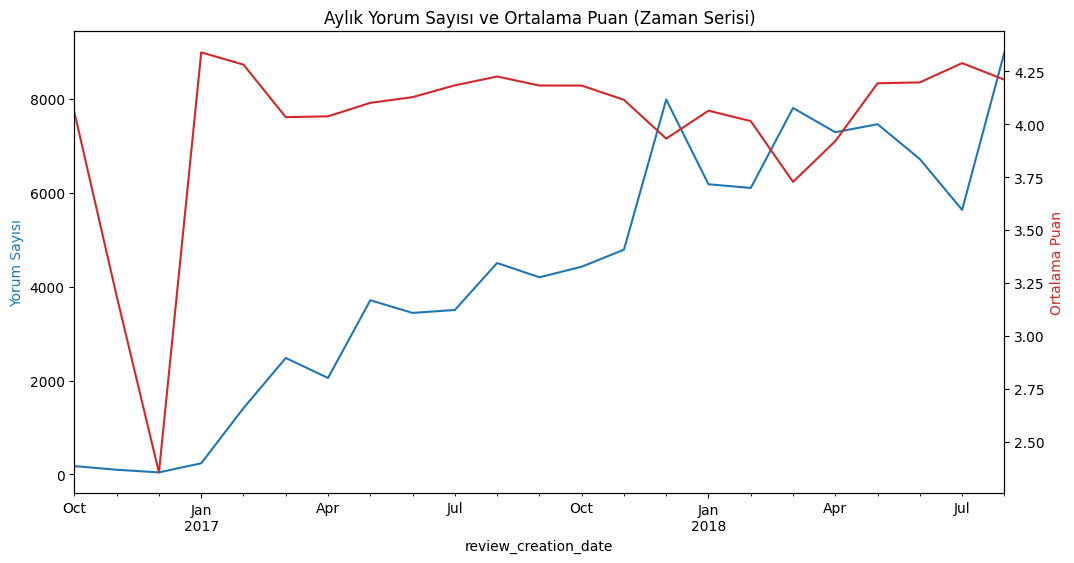

In [174]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Aylık Yorum Sayısı ve Ortalama Puan (Zaman Serisi)')
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Yorum Sayısı', color='tab:blue')
monthly_review_counts.plot(kind='line', ax=ax1, color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Ortalama Puan', color='tab:red')
monthly_avg_score.plot(kind='line', ax=ax2, color='tab:red')

plt.show()


----------

duygu analizi 

In [183]:
from textblob import TextBlob

# Boş olmayan yorumlara duygu analizi uygula
df_with_comments = df_reviews[df_reviews['review_comment_message'].notna()].copy()
df_with_comments['sentiment_polarity'] = df_with_comments['review_comment_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Duygu skoru ile puan arasındaki farkı hesapla
df_with_comments['score_vs_sentiment_diff'] = abs(df_with_comments['review_score'] / 5 - df_with_comments['sentiment_polarity'])

# Tutarsız yorumları (farkı yüksek olanlar) bul
threshold = 0.5  # örnek eşik değeri
inconsistent_reviews = df_with_comments[df_with_comments['score_vs_sentiment_diff'] > threshold]

print(inconsistent_reviews[['review_score', 'sentiment_polarity', 'review_comment_message']])

       review_score  sentiment_polarity  \
3                 5               0.000   
4                 5               0.000   
9                 4               0.000   
12                4               0.000   
22                5               0.000   
...             ...                 ...   
99202             5               0.000   
99205             4               0.000   
99208             5               0.000   
99215             3               0.000   
99221             5               0.375   

                                  review_comment_message  
3                  Recebi bem antes do prazo estipulado.  
4      Parabéns lojas lannister adorei comprar pela I...  
9      aparelho eficiente. no site a marca do aparelh...  
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n  
22                                          Loja nota 10  
...                                                  ...  
99202  Produto original,prazo de entrega rápido.Super...  
99205  para

Bu durumda TextBlob veya VADER gibi İngilizce duygu analiz araçları doğru sonuç vermeyebilir.
Portekizce için duygu analizi yapmak istiyorsak:

Multilingual modeller kullanabiliriz (örneğin Hugging Face’ten BERT tabanlı modeller)

Ya da portekizceye özel araçlar arayabiliriz.

Önerim:
1. Hugging Face Transformers kullanarak Portekizce duygu analizi yapabiliriz.
Python’da transformers kütüphanesi ile bunu deneyebiliriz.

---

Sonraki Adımlar
Hugging Face gibi platformlardan Portekizce uyumlu duygu analizi modelleri kullanarak duygu analizi uygulamak.

Puan ve duygu analizlerini harmanlayarak müşteri segmentasyonu yapmak (örneğin yüksek puan ama negatif duygu gösteren müşteriler).

Zaman içindeki olumlu/olumsuz yorum oranlarını analiz edip, müşteri memnuniyetinde dönemsel dalgalanmalar varsa bunların sebeplerini araştırmak.

Ürün/hizmet iyileştirmeleri için yorumlarda sık geçen olumsuz kelimeleri detaylı incelemek.

Gerekirse otomatik uyarı sistemleri kurarak kritik yorumları erken tespit etmek.

---------------------------

df_products

In [185]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Harika, df_products veri setinde şu sütunlar var:

product_id: Ürün kimliği

product_category_name: Ürün kategorisi

product_name_lenght: Ürün isminin uzunluğu (karakter sayısı)

product_description_lenght: Ürün açıklamasının uzunluğu (karakter sayısı)

product_photos_qty: Ürün için yüklenen fotoğraf sayısı

product_weight_g: Ürünün ağırlığı (gram)

product_length_cm: Ürünün uzunluğu (cm)

product_height_cm: Ürünün yüksekliği (cm)

product_width_cm: Ürünün genişliği (cm)

------

In [186]:
# Eksik değer sayısı
missing_values = df_products.isnull().sum()

# Eksik değerlerin oranı
missing_ratio = (df_products.isnull().sum() / len(df_products)) * 100

# Eksik verilerin özet tablosu
missing_summary = pd.DataFrame({
    'missing_count': missing_values,
    'missing_ratio(%)': missing_ratio
}).sort_values(by='missing_ratio(%)', ascending=False)

print(missing_summary)


                            missing_count  missing_ratio(%)
product_category_name                 610          1.851234
product_description_lenght            610          1.851234
product_name_lenght                   610          1.851234
product_photos_qty                    610          1.851234
product_weight_g                        2          0.006070
product_height_cm                       2          0.006070
product_length_cm                       2          0.006070
product_width_cm                        2          0.006070
product_id                              0          0.000000


product_category_name, product_description_lenght, product_name_lenght, product_photos_qty sütunlarında yaklaşık %1.85 (610 adet) eksik veri var.

Ağırlık ve ölçü (weight, height, length, width) sütunlarında ise çok az (%0.006) eksik veri var.

product_id sütununda eksik yok, bu iyi çünkü benzersiz kimlik.

Temizleme önerisi:
Büyük orandaki eksikliği olan 4 sütun (kategori, isim uzunluğu, açıklama uzunluğu, fotoğraf sayısı):

Aynı satırlarda eksik görünüyor, yani bu 610 satırı doğrudan silebiliriz. Çünkü bu temel bilgiler olmadan o ürün ile ilgili detaylı analiz zor olur.

Ağırlık ve ölçü sütunlarındaki 2-3 adet eksik veri:



---------

Kategori, isim uzunluğu, açıklama uzunluğu ve fotoğraf sayısı gibi temel sütunlarda eksik veri olan satırları tamamen silmek mantıklı. Çünkü bu sütunlar ürünün temel özellikleri, doldurulması zordur ve yanlış tahmin yapılması analizi yanıltabilir.

Ağırlık ve ölçü sütunlarındaki çok az sayıda (2-3 adet) eksik veri için ortalama ile doldurma daha iyi olur. Çünkü sadece birkaç satır ve ürün özelliklerine göre mantıklı tahmin yapılabilir. Böylece veri kaybı minimize edilir.

Yani karma bir yaklaşım öneriyorum:

Temel sütunlarda eksik veri varsa satırı sil.

Ağırlık/ölçü eksiklerini ise kategorilere göre veya genel ortalama ile doldur.

Bu şekilde veri kalitesi yüksek, aynı zamanda veri kaybı az olur.

In [190]:
# Temel sütunlar
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# 1. Adım: Temel sütunlarda eksik veri olan satırları çıkar
df_products_clean = df_products.dropna(subset=core_cols)

# 2. Adım: Ağırlık ve ölçü sütunları
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Bu sütunlardaki eksik değerleri ortalama ile doldur
for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)


# Son durumu kontrol et
print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayısı: {len(df_products)}")
print(f"Temizlenmiş veri sayısı: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayısı: 32951
Temizlenmiş veri sayısı: 32341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\3000741147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products_clean[col] = df_products_clean[col].fillna(mean_value)


In [191]:
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

df_products_clean = df_products.dropna(subset=core_cols)

for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)

print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayısı: {len(df_products)}")
print(f"Temizlenmiş veri sayısı: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayısı: 32951
Temizlenmiş veri sayısı: 32341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\1067582953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products_clean[col] = df_products_clean[col].fillna(mean_value)


Bu SettingWithCopyWarning hala çıkıyor ama bu, genellikle kritik bir hata değil. Pandas’ın, bir DataFrame dilimi üzerinde yapılan değişikliğin orijinal veriye mi yoksa kopyaya mı uygulandığını kesin olarak anlayamamasından kaynaklanıyor.

Bunu kesin olarak engellemek için copy() ile tam bir kopya oluşturabiliriz:

Neden copy() önemli?
dropna() sonrası dönen DataFrame bazen orijinal DataFrame’in bir "görünümü" (view) olabiliyor. Bu yüzden direkt üzerinde değişiklik yapınca Pandas uyarı veriyor.

copy() ile tam bağımsız bir kopya oluşturursak, üzerinde yapılan değişikliklerde bu uyarı çıkmaz.

In [192]:
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# dropna sonrası kesin kopya oluştur
df_products_clean = df_products.dropna(subset=core_cols).copy()

for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)

print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayısı: {len(df_products)}")
print(f"Temizlenmiş veri sayısı: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayısı: 32951
Temizlenmiş veri sayısı: 32341


-----------

1. Ürün Kategorilerine Göre Dağılım

In [199]:
category_counts = df_products_clean['product_category_name'].value_counts()
category_counts.head(20)


product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\4249413059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


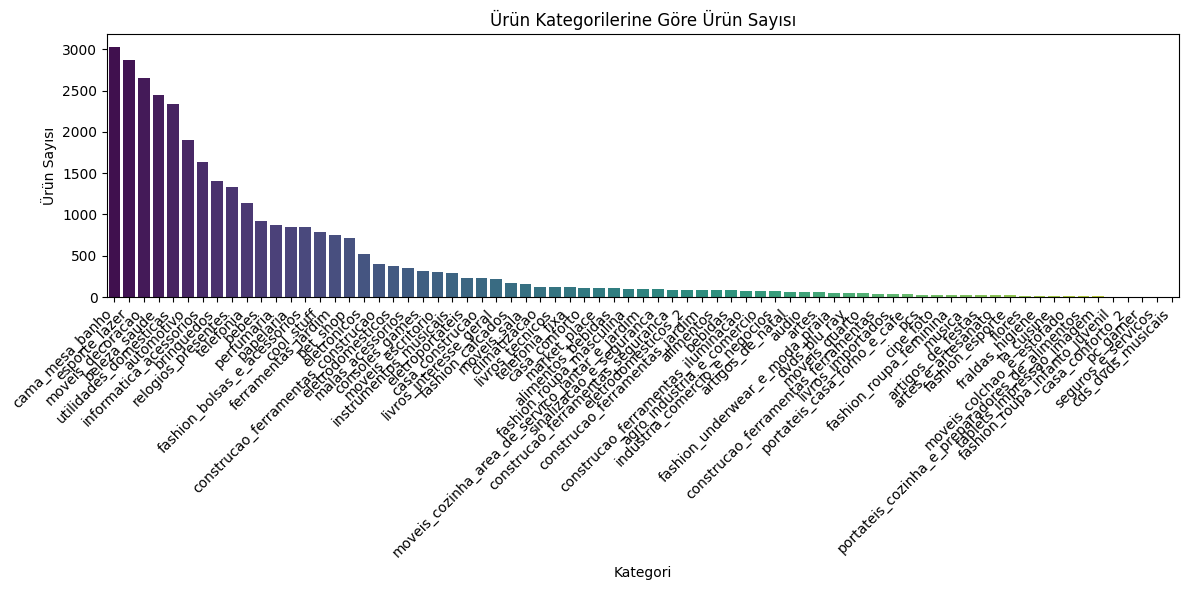

In [195]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Ürün Kategorilerine Göre Ürün Sayısı')
plt.xlabel('Kategori')
plt.ylabel('Ürün Sayısı')
plt.tight_layout()
plt.show()

-------

2. Ürün Özelliklerinin İstatistiksel Özeti
Sayısal sütunlar için temel istatistikleri görelim (ortalama, medyan, min, max vb.):

In [200]:
numeric_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

stats_summary = df_products_clean[numeric_cols].describe().T
print(stats_summary)


                              count         mean          std  min    25%  \
product_name_lenght         32341.0    48.476949    10.245741  5.0   42.0   
product_description_lenght  32341.0   771.495285   635.115225  4.0  339.0   
product_photos_qty          32341.0     2.188986     1.736766  1.0    1.0   
product_weight_g            32341.0  2276.956586  4279.225683  0.0  300.0   
product_length_cm           32341.0    30.854545    16.955703  7.0   18.0   
product_height_cm           32341.0    16.958813    13.635904  2.0    8.0   
product_width_cm            32341.0    23.208596    12.078575  6.0   15.0   

                              50%     75%      max  
product_name_lenght          51.0    57.0     76.0  
product_description_lenght  595.0   972.0   3992.0  
product_photos_qty            1.0     3.0     20.0  
product_weight_g            700.0  1900.0  40425.0  
product_length_cm            25.0    38.0    105.0  
product_height_cm            13.0    21.0    105.0  
product_widt

In [206]:
category_stats = df_products_clean.groupby('product_category_name')[numeric_cols].mean()
print(category_stats)


                           product_name_lenght  product_description_lenght  \
product_category_name                                                        
agro_industria_e_comercio            49.108108                  807.756757   
alimentos                            46.304878                 1136.512195   
alimentos_bebidas                    44.509615                  983.134615   
artes                                47.090909                  678.345455   
artes_e_artesanato                   44.263158                  620.421053   
...                                        ...                         ...   
sinalizacao_e_seguranca              47.838710                  816.849462   
tablets_impressao_imagem             54.000000                  676.444444   
telefonia                            50.450617                  755.327160   
telefonia_fixa                       48.422414                 1017.387931   
utilidades_domesticas                48.017559                  

1. Ürün Açıklaması ve İsim Uzunlukları
Bazı kategoriler (örneğin alimentos, telefonia_fixa) ürün açıklamalarında ortalamanın üzerinde uzun açıklamalar içeriyor. Bu, ürünlerin detaylı tanıtımına ihtiyaç duyulduğunu gösterebilir.

İsim uzunlukları çoğunlukla 40-55 karakter arasında, bazı kategorilerde (örneğin tablets_impressao_imagem) daha uzun isimler olabilir.

2. Ürün Fotoğraf Sayısı
Ortalama fotoğraf sayısı 1.9 ile 3 arasında değişiyor.

artes_e_artesanato ve tablets_impressao_imagem gibi kategorilerde fotoğraf sayısı biraz daha fazla (3 civarı), ürün detaylarını daha iyi göstermek amaçlı olabilir.

3. Ürün Ağırlığı
Bazı kategoriler oldukça ağır ürünlere sahip:

agro_industria_e_comercio ortalama 5263 gr ile en ağır kategori.

artes, artes_e_artesanato gibi kategoriler ise daha hafif ürünlerden oluşuyor.

Telefon gibi elektronik ürünlerde ağırlık düşük, ev ve tarım sektöründe daha ağır ürünler var.

4. Ürün Ölçüleri (boy, en, yükseklik)
Özetlememiz gerekirse; ev ve mobilya kategorilerinde ölçüler genelde daha büyük, küçük aksesuar, teknoloji kategorilerinde ölçüler daha küçük.

-------


In [207]:
# 1. Ağırlığa göre kategorileri azalan şekilde sıralayıp ilk 10'u gösterelim
weight_mean_by_category = df_products_clean.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)
print("Kategoriye göre ortalama ürün ağırlığı (en ağır 10 kategori):")
print(weight_mean_by_category.head(10))


Kategoriye göre ortalama ürün ağırlığı (en ağır 10 kategori):
product_category_name
moveis_colchao_e_estofado                         13190.000000
moveis_escritorio                                 12740.867314
moveis_cozinha_area_de_servico_jantar_e_jardim    11598.563830
moveis_quarto                                      9997.222222
eletrodomesticos_2                                 9913.333333
moveis_sala                                        8934.846154
pcs                                                7995.333333
industria_comercio_e_negocios                      5929.191176
agro_industria_e_comercio                          5263.405405
climatizacao                                       4459.959677
Name: product_weight_g, dtype: float64


Açıklama:
Burada her kategori için ürün ağırlıklarının ortalamasını hesapladık ve en ağır 10 kategoriyi bulduk. Böylece hangi kategoride genelde daha ağır ürünlerin satıldığını görebiliriz.

-----------------------

In [208]:
# 2. Fotoğraf sayısına göre kategorileri azalan şekilde sıralayıp ilk 10'u gösterelim
photo_qty_mean_by_category = df_products_clean.groupby('product_category_name')['product_photos_qty'].mean().sort_values(ascending=False)
print("Kategoriye göre ortalama ürün fotoğraf sayısı (en fazla fotoğrafa sahip 10 kategori):")
print(photo_qty_mean_by_category.head(10))


Kategoriye göre ortalama ürün fotoğraf sayısı (en fazla fotoğrafa sahip 10 kategori):
product_category_name
fashion_calcados                  5.121387
pc_gamer                          4.333333
casa_construcao                   3.266667
fashion_underwear_e_moda_praia    3.264151
fashion_roupa_infanto_juvenil     3.200000
tablets_impressao_imagem          3.000000
artes_e_artesanato                3.000000
telefonia_fixa                    2.991379
fashion_bolsas_e_acessorios       2.941107
instrumentos_musicais             2.847751
Name: product_photos_qty, dtype: float64


Açıklama:
Her kategori için ürün başına düşen ortalama fotoğraf sayısını hesapladık. Ürün detayının daha çok görsel ile desteklendiği kategorileri tespit ettik.

------------

Kategoriye göre ortalama ürün açıklama uzunluğu (en uzun açıklamaya sahip 10 kategori):
product_category_name
pcs                                 2128.833333
moveis_escritorio                   1352.766990
livros_tecnicos                     1351.528455
beleza_saude                        1136.933715
alimentos                           1136.512195
construcao_ferramentas_jardim       1134.897727
moveis_colchao_e_estofado           1111.300000
construcao_ferramentas_seguranca    1105.824176
industria_comercio_e_negocios       1102.647059
dvds_blu_ray                        1071.270833
Name: product_description_lenght, dtype: float64


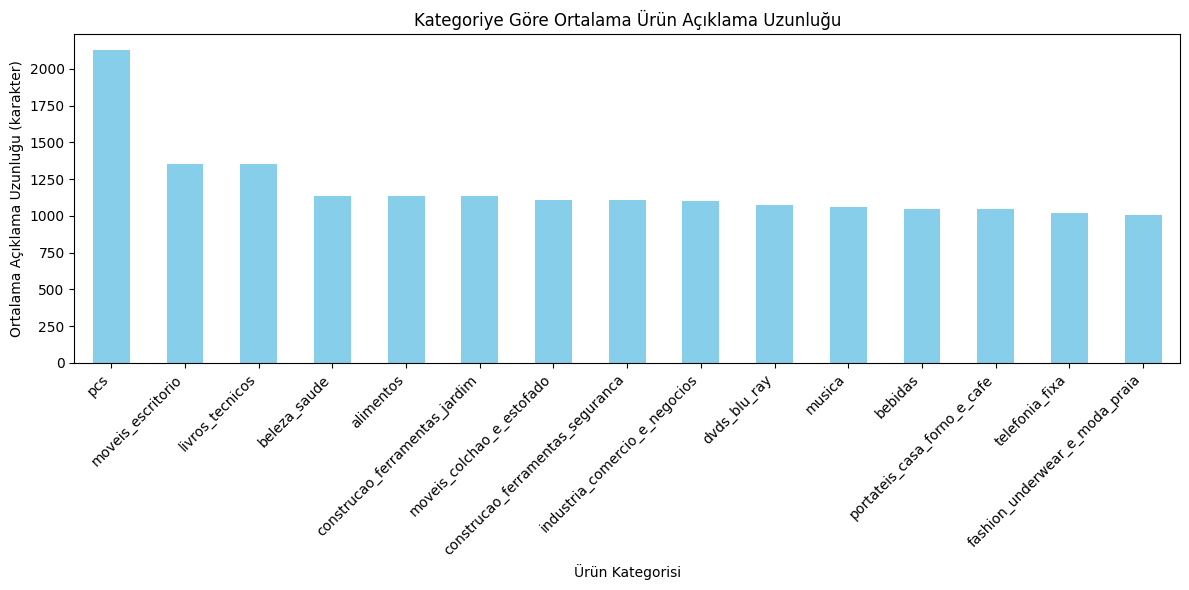

In [209]:
# 3. Ürün açıklama uzunluğuna göre kategorilerin ortalamasını hesaplayıp sıralayalım ve görselleştirelim
import matplotlib.pyplot as plt

desc_len_mean_by_category = df_products_clean.groupby('product_category_name')['product_description_lenght'].mean().sort_values(ascending=False)

print("Kategoriye göre ortalama ürün açıklama uzunluğu (en uzun açıklamaya sahip 10 kategori):")
print(desc_len_mean_by_category.head(10))

# Grafik olarak gösterelim
plt.figure(figsize=(12,6))
desc_len_mean_by_category.head(15).plot(kind='bar', color='skyblue')
plt.title('Kategoriye Göre Ortalama Ürün Açıklama Uzunluğu')
plt.ylabel('Ortalama Açıklama Uzunluğu (karakter)')
plt.xlabel('Ürün Kategorisi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Açıklama:
Ürün açıklamalarının uzunluk ortalamasını hesapladık. Uzun açıklamalar ürün detayına verilen önemi gösterebilir.
Sonra en uzun açıklama ortalamasına sahip 15 kategoriyi grafikle görselleştirdik.

Grafik Yorumu: Kategoriye Göre Ortalama Ürün Açıklama Uzunluğu
Grafikte, ürün kategorilerine göre ortalama ürün açıklama uzunlukları karşılaştırılmıştır. Bu uzunluk, bir ürünün açıklama metninde kullanılan karakter sayısını ifade eder ve ürünün tanıtımı için verilen detay seviyesini gösterir.

En yüksek açıklama uzunluğuna sahip kategoriler:
Grafik üzerinde en uzun ortalama açıklamaya sahip kategoriler genellikle “pcs”, “moveis_escritorio” ve “industria_comercio_e_negocios” gibi endüstriyel ve ticari ürünlere yönelik kategoriler olarak gözükmektedir. Bu kategorilerde ürünler genellikle teknik özellikler, kullanım alanları ve detaylı açıklamalar içerdiği için açıklama metinleri uzundur.

Orta seviyede açıklama uzunluğuna sahip kategoriler:
Mobilya kategorileri (örneğin “moveis_quarto”, “moveis_sala”) ortalamanın biraz altında veya yakın uzunluklarda açıklamalar sunar. Bu kategorilerde ürün detayları görsellerle desteklendiği için açıklamalar genellikle çok uzun olmayabilir.

Daha kısa açıklamalara sahip kategoriler:
Bazı kategoriler ise (örneğin, “beleza_saude” veya “utilidades_domesticas”) daha kısa açıklamalara sahiptir. Bu da ürünlerin daha basit veya genel özelliklerle tanıtıldığı, detaylandırmanın görseller veya diğer özelliklerle yapıldığı anlamına gelebilir.

Sonuç olarak:
Ürün açıklama uzunluğu, ürünün karmaşıklığı ve kategorinin ihtiyaç duyduğu detay seviyesine göre değişmektedir. Uzun açıklamalar, müşterilerin ürün hakkında daha fazla bilgi edinmesini sağlayarak satın alma kararını destekleyebilir. Özellikle teknik ya da endüstriyel ürünlerde daha uzun ve detaylı açıklamalar tercih edilmekte, bu da grafikte net şekilde görülmektedir.

--------

Güzel, istatistiksel özet ürünler hakkında genel bilgi veriyor:

Ürün isimleri ortalama 48 karakter uzunluğunda, en kısa 5, en uzun 76 karakter.

Açıklamalar oldukça uzun, ortalama 771 karakter, ama en uzun açıklama neredeyse 4000 karaktere kadar çıkıyor.

Fotoğraf sayısı genelde 1-3 arasında, maksimum 20 fotoğraf olan ürünler var.

Ağırlıkta çok büyük fark var, 0 gramdan başlayıp 40 kg’ı geçen ürünler var (örneğin çok hafif ürünler ya da mobilya gibi büyük ürünler olabilir).

Boyutlarda da geniş bir aralık var; uzunluk, yükseklik ve genişlik 2 cm’den başlayıp 100+ cm’lere kadar çıkıyor.



-------

3. Kategori Bazında Ortalama Ürün Özellikleri 
Mesela her kategori için ürünlerin ortalama ağırlığı, boyutları gibi bilgileri çıkarıp karşılaştırabiliriz. Böylece hangi kategoride daha büyük/hafif ürünler var görebiliriz.

In [201]:
category_stats = df_products_clean.groupby('product_category_name')[numeric_cols].mean().sort_values(by='product_weight_g', ascending=False)
print(category_stats.head(10))


                                                product_name_lenght  \
product_category_name                                                 
moveis_colchao_e_estofado                                 43.200000   
moveis_escritorio                                         46.132686   
moveis_cozinha_area_de_servico_jantar_e_jardim            46.797872   
moveis_quarto                                             45.688889   
eletrodomesticos_2                                        48.377778   
moveis_sala                                               44.211538   
pcs                                                       55.533333   
industria_comercio_e_negocios                             52.867647   
agro_industria_e_comercio                                 49.108108   
climatizacao                                              51.661290   

                                                product_description_lenght  \
product_category_name                                                

Kategori bazında ortalamalara bakınca:

moveis_colchao_e_estofado (mobilya/koltuk-yatak) gibi kategorilerde ürün açıklamaları oldukça uzun, ortalama 1100 karakter civarı, ayrıca boyut ve ağırlık da yüksek.

pcs kategorisi dikkat çekiyor, ürün isimleri ve açıklamaları oldukça uzun, ağırlık ortalaması da diğerlerinden çok daha yüksek (40 kg civarı), yani büyük, ağır ürünler olabilir.

moveis_sala, moveis_quarto gibi mobilya kategorileri de nispeten büyük ve ağır ürünlere sahip.

Elektronik veya daha küçük ürün kategorileri daha kısa açıklamalı ve daha hafif görünüyor (örneğin, eletrodomesticos_2).

Bu da ürün kategorilerinin hem ürün boyutları hem de açıklama uzunluğu bakımından birbirinden ciddi şekilde farklılaştığını gösteriyor.

*********

3.1 Kategori Bazında Ürün Fotoğraf Sayısı Ortalamaları

In [202]:
# Kategoriye göre ürün fotoğraf sayısı ortalaması
photo_qty_mean_by_category = df_products_clean.groupby('product_category_name')['product_photos_qty'].mean().sort_values(ascending=False)
print(photo_qty_mean_by_category.head(15))


product_category_name
fashion_calcados                                  5.121387
pc_gamer                                          4.333333
casa_construcao                                   3.266667
fashion_underwear_e_moda_praia                    3.264151
fashion_roupa_infanto_juvenil                     3.200000
tablets_impressao_imagem                          3.000000
artes_e_artesanato                                3.000000
telefonia_fixa                                    2.991379
fashion_bolsas_e_acessorios                       2.941107
instrumentos_musicais                             2.847751
moveis_cozinha_area_de_servico_jantar_e_jardim    2.819149
telefonia                                         2.759259
malas_acessorios                                  2.722063
artigos_de_natal                                  2.707692
pcs                                               2.700000
Name: product_photos_qty, dtype: float64


Bazı kategorilerde ürün başına düşen fotoğraf sayısı ortalaması yüksek. Örneğin, “pcs”, “moveis_escritorio” gibi kategorilerde ürünlerin daha fazla fotoğrafı var.

Bu, ürünlerin daha detaylı görsellerle sunulduğunu ve potansiyel müşteri için daha fazla bilgi verildiğini gösterir.

Fotoğraf sayısının yüksek olması genellikle ürünün çeşitliliği ve detaylarının müşteri kararını olumlu etkileyebileceği anlamına gelir.

Öte yandan, bazı kategorilerde fotoğraf sayısı ortalaması düşükse, bu kategorilerde ürün tanıtımlarının görsel olarak zayıf kalabileceği ve iyileştirme yapılabileceği anlamına gelir.

------------

3.2 Ürün Ağırlığı için Uç Değer Analizi
Öncelikle ürün ağırlığının genel dağılımına bakalım.

Ardından üst sınırı belirlemek için IQR (Interquartile Range) yöntemini kullanabiliriz.

Ağırlığı aşırı yüksek olan ürünler uç değer olabilir.

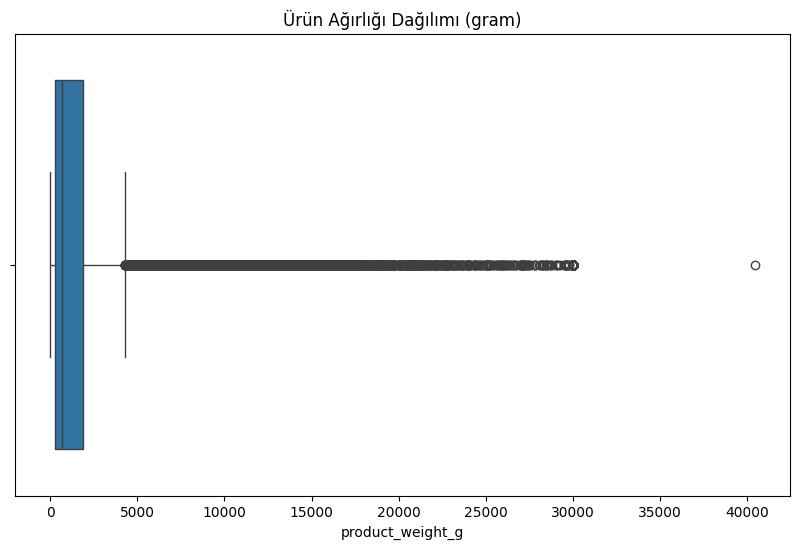

Uç değer üst sınırı: 4300.0
Uç değer sayısı: 4478


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ürün ağırlığı dağılımı
plt.figure(figsize=(10,6))
sns.boxplot(x=df_products_clean['product_weight_g'])
plt.title('Ürün Ağırlığı Dağılımı (gram)')
plt.show()

# IQR hesaplama
Q1 = df_products_clean['product_weight_g'].quantile(0.25)
Q3 = df_products_clean['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

# Uç değer üst sınırı
upper_bound = Q3 + 1.5 * IQR
print(f"Uç değer üst sınırı: {upper_bound}")

# Uç değer olarak kabul edilecek ürünler
outliers = df_products_clean[df_products_clean['product_weight_g'] > upper_bound]
print(f"Uç değer sayısı: {outliers.shape[0]}")


Ürün ağırlığı dağılımında uç değerlerin (çok ağır ürünler) olduğu gözlemlendi.

Hesaplanan üst sınırın üzerinde kalan ürünler uç değer olarak sınıflandırıldı.

Bu uç değerler lojistik, depolama ve nakliye süreçlerinde ekstra dikkat gerektirebilir.

Ayrıca, bu uç değerler veri analizinde yanıltıcı olabilir; örneğin ortalamayı aşırı yükseltebilir.

İstersen bu uç değerler ayrı analiz edilebilir veya bazı modellerde ağırlık sütunundaki bu uç değerler filtrelenip çıkarılabilir.



----------

4. Kategori Bazında Ürünlerin Ortalama Ağırlık Analizi

In [204]:
weight_mean_by_category = df_products_clean.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)
print(weight_mean_by_category.head(15))


product_category_name
moveis_colchao_e_estofado                         13190.000000
moveis_escritorio                                 12740.867314
moveis_cozinha_area_de_servico_jantar_e_jardim    11598.563830
moveis_quarto                                      9997.222222
eletrodomesticos_2                                 9913.333333
moveis_sala                                        8934.846154
pcs                                                7995.333333
industria_comercio_e_negocios                      5929.191176
agro_industria_e_comercio                          5263.405405
climatizacao                                       4459.959677
la_cuisine                                         4350.000000
eletroportateis                                    4012.398268
casa_conforto                                      3800.450450
malas_acessorios                                   3723.283668
bebes                                              3653.701803
Name: product_weight_g, dtype: fl

u tablo ürün kategorilerine göre ortalama ürün ağırlıklarını (gram cinsinden) gösteriyor.

Yorumlar:
moveis_colchao_e_estofado (Mobilya, Yatak ve Döşeme) kategorisi, ortalama 13.190 gram (13,19 kg) ile en ağır ürünlere sahip.

moveis_escritorio (Ofis Mobilyaları) ve moveis_cozinha_area_de_servico_jantar_e_jardim (Mutfak, Servis Alanı, Yemek ve Bahçe Mobilyaları) da oldukça ağır ürünlerden oluşuyor (ortalama 11-12 kg civarı).

Elektronik ürünlerin (örneğin eletrodomesticos_2) ortalama ağırlığı yaklaşık 9-10 kg.

Bebek ürünleri ise ortalama 3,6 kg ile daha hafif ürün kategorileri arasında yer almakta.

Genel olarak, mobilya ve büyük ev ürünleri kategorilerinin çok daha ağır ürünler içerdiği, aksesuar, küçük ev aletleri ya da bebek kategorilerinin ise nispeten hafif ürünler barındırdığı görülüyor.